# EL Niño-Southern Oscillation (ENSO) Winter Snowfall Depth Analysis

## Research Questions (Q):
1. Has annual snowfall and or snow depth been significantly decreasing since 1970?
2. What have been the peak snowfall and depths for each decade?
3. What have been the minumum snowfall and depths for each decade?
4. What have been the average and median snowfall and depths for each decade?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
suppress_warnings = True

In [2]:
# Load the dataset into a DataFrame
enso = pd.read_csv('enso_clean.csv')

In [3]:
enso.head()

,Year,Baker Snowfall,Paradise Snowfall,Hyak Snowfall,Crystal Mountain Snow Depth,Mission Ridge Snow Depth,Mt Baker Ski Area Snow Depth,Paradise Snow Depth,Snoqualmie Pass Snow Depth,Stampede Pass Snow Depth,...,Hurricane Days,Major Hurricanes,Major Hurricane Days,Accumulated Cyclone Energy,OND_NDJ,OND_MAM Mean,Decade,Winter/Spring ENSO,ENSO Category,Annual Anomaly Category
0,1970,795.0,649.0,383.0,63.0,30.0,172.5,135.0,78.0,116.0,...,40.25,5,6.50,165.7,1.4,0.45,1970s,Neutral,Neutral,Moderately Below Average
1,1971,1063.0,884.0,492.0,111.0,56.0,268.0,271.0,79.0,171.0,...,6.75,2,1.00,40.2,-2.0,-1.12,1970s,Moderate La Niña,La Niña,Highly Below Average
2,1972,1008.0,1122.0,600.0,89.0,26.0,204.0,268.0,125.0,140.0,...,28.75,1,1.00,96.8,-1.9,-0.42,1970s,Neutral,Neutral,Slightly Below Average
3,1973,612.0,577.0,233.0,43.0,20.0,141.0,122.0,45.0,66.0,...,6.25,0,0.00,35.6,4.2,1.27,1970s,Moderate El Niño,El Niño,Slightly Below Average
4,1974,958.0,1070.0,692.0,108.0,52.0,247.0,264.0,153.0,154.0,...,10.00,1,0.25,47.9,-3.9,-1.58,1970s,Strong La Niña,La Niña,Moderately Below Average


In [4]:
enso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            54 non-null     int64  
 1   Baker Snowfall                  54 non-null     float64
 2   Paradise Snowfall               54 non-null     float64
 3   Hyak Snowfall                   54 non-null     float64
 4   Crystal Mountain Snow Depth     54 non-null     float64
 5   Mission Ridge Snow Depth        54 non-null     float64
 6   Mt Baker Ski Area Snow Depth    54 non-null     float64
 7   Paradise Snow Depth             54 non-null     float64
 8   Snoqualmie Pass Snow Depth      54 non-null     float64
 9   Stampede Pass Snow Depth        54 non-null     float64
 10  Stevens Pass Snow Depth         54 non-null     float64
 11  Sea Temperature Annual Anomaly  54 non-null     float64
 12  Named Storms (Prior Year)       54 non

In [5]:
pd.set_option('display.max_columns', 30)

In [6]:
enso.describe()

,Year,Baker Snowfall,Paradise Snowfall,Hyak Snowfall,Crystal Mountain Snow Depth,Mission Ridge Snow Depth,Mt Baker Ski Area Snow Depth,Paradise Snow Depth,Snoqualmie Pass Snow Depth,Stampede Pass Snow Depth,Stevens Pass Snow Depth,Sea Temperature Annual Anomaly,Named Storms (Prior Year),Named Storm Days,Hurricanes,Hurricane Days,Major Hurricanes,Major Hurricane Days,Accumulated Cyclone Energy,OND_NDJ,OND_MAM Mean
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,1996.500000,656.092593,687.351852,360.203704,72.092593,45.722222,167.185185,172.370370,77.685185,89.166667,97.296296,0.241574,12.722222,59.902778,6.518519,23.305556,2.611111,5.634259,103.496296,-0.105556,-0.054074
std,15.732133,182.831737,162.663927,123.198778,26.265889,14.222181,52.807169,48.318634,34.316410,33.483733,31.692288,0.366957,5.188582,27.931242,2.918650,14.093494,1.763537,5.472641,59.389888,2.277819,0.907436
min,1970.000000,277.000000,266.000000,87.000000,6.000000,20.000000,17.000000,73.000000,2.000000,17.000000,22.000000,-0.510000,4.000000,14.500000,2.000000,3.250000,0.000000,0.000000,17.400000,-3.900000,-1.580000
25%,1983.250000,532.750000,589.250000,271.250000,60.000000,37.000000,141.500000,136.500000,54.500000,65.250000,79.000000,0.007500,9.000000,37.750000,4.000000,11.062500,1.000000,1.000000,55.125000,-1.900000,-0.755000
50%,1996.500000,638.500000,677.500000,346.000000,70.000000,46.000000,171.750000,167.000000,78.000000,82.500000,95.500000,0.201000,12.000000,57.500000,6.000000,21.500000,2.000000,4.000000,94.000000,-0.350000,-0.160000
75%,2009.750000,792.750000,750.000000,418.500000,89.000000,54.000000,196.750000,206.000000,95.000000,113.750000,116.500000,0.457500,15.000000,80.500000,8.000000,31.437500,3.750000,9.125000,144.600000,1.550000,0.547500
max,2023.000000,1140.000000,1122.000000,692.000000,144.000000,86.000000,311.000000,280.000000,153.000000,171.000000,164.000000,0.930000,30.000000,126.250000,15.000000,61.500000,7.000000,22.250000,245.300000,5.200000,2.050000


In [7]:
enso.describe(include = 'object')

,Decade,Winter/Spring ENSO,ENSO Category,Annual Anomaly Category
count,54,54,54,54
unique,6,8,3,6
top,1970s,Neutral,Neutral,Slightly Above Average
freq,10,21,21,15


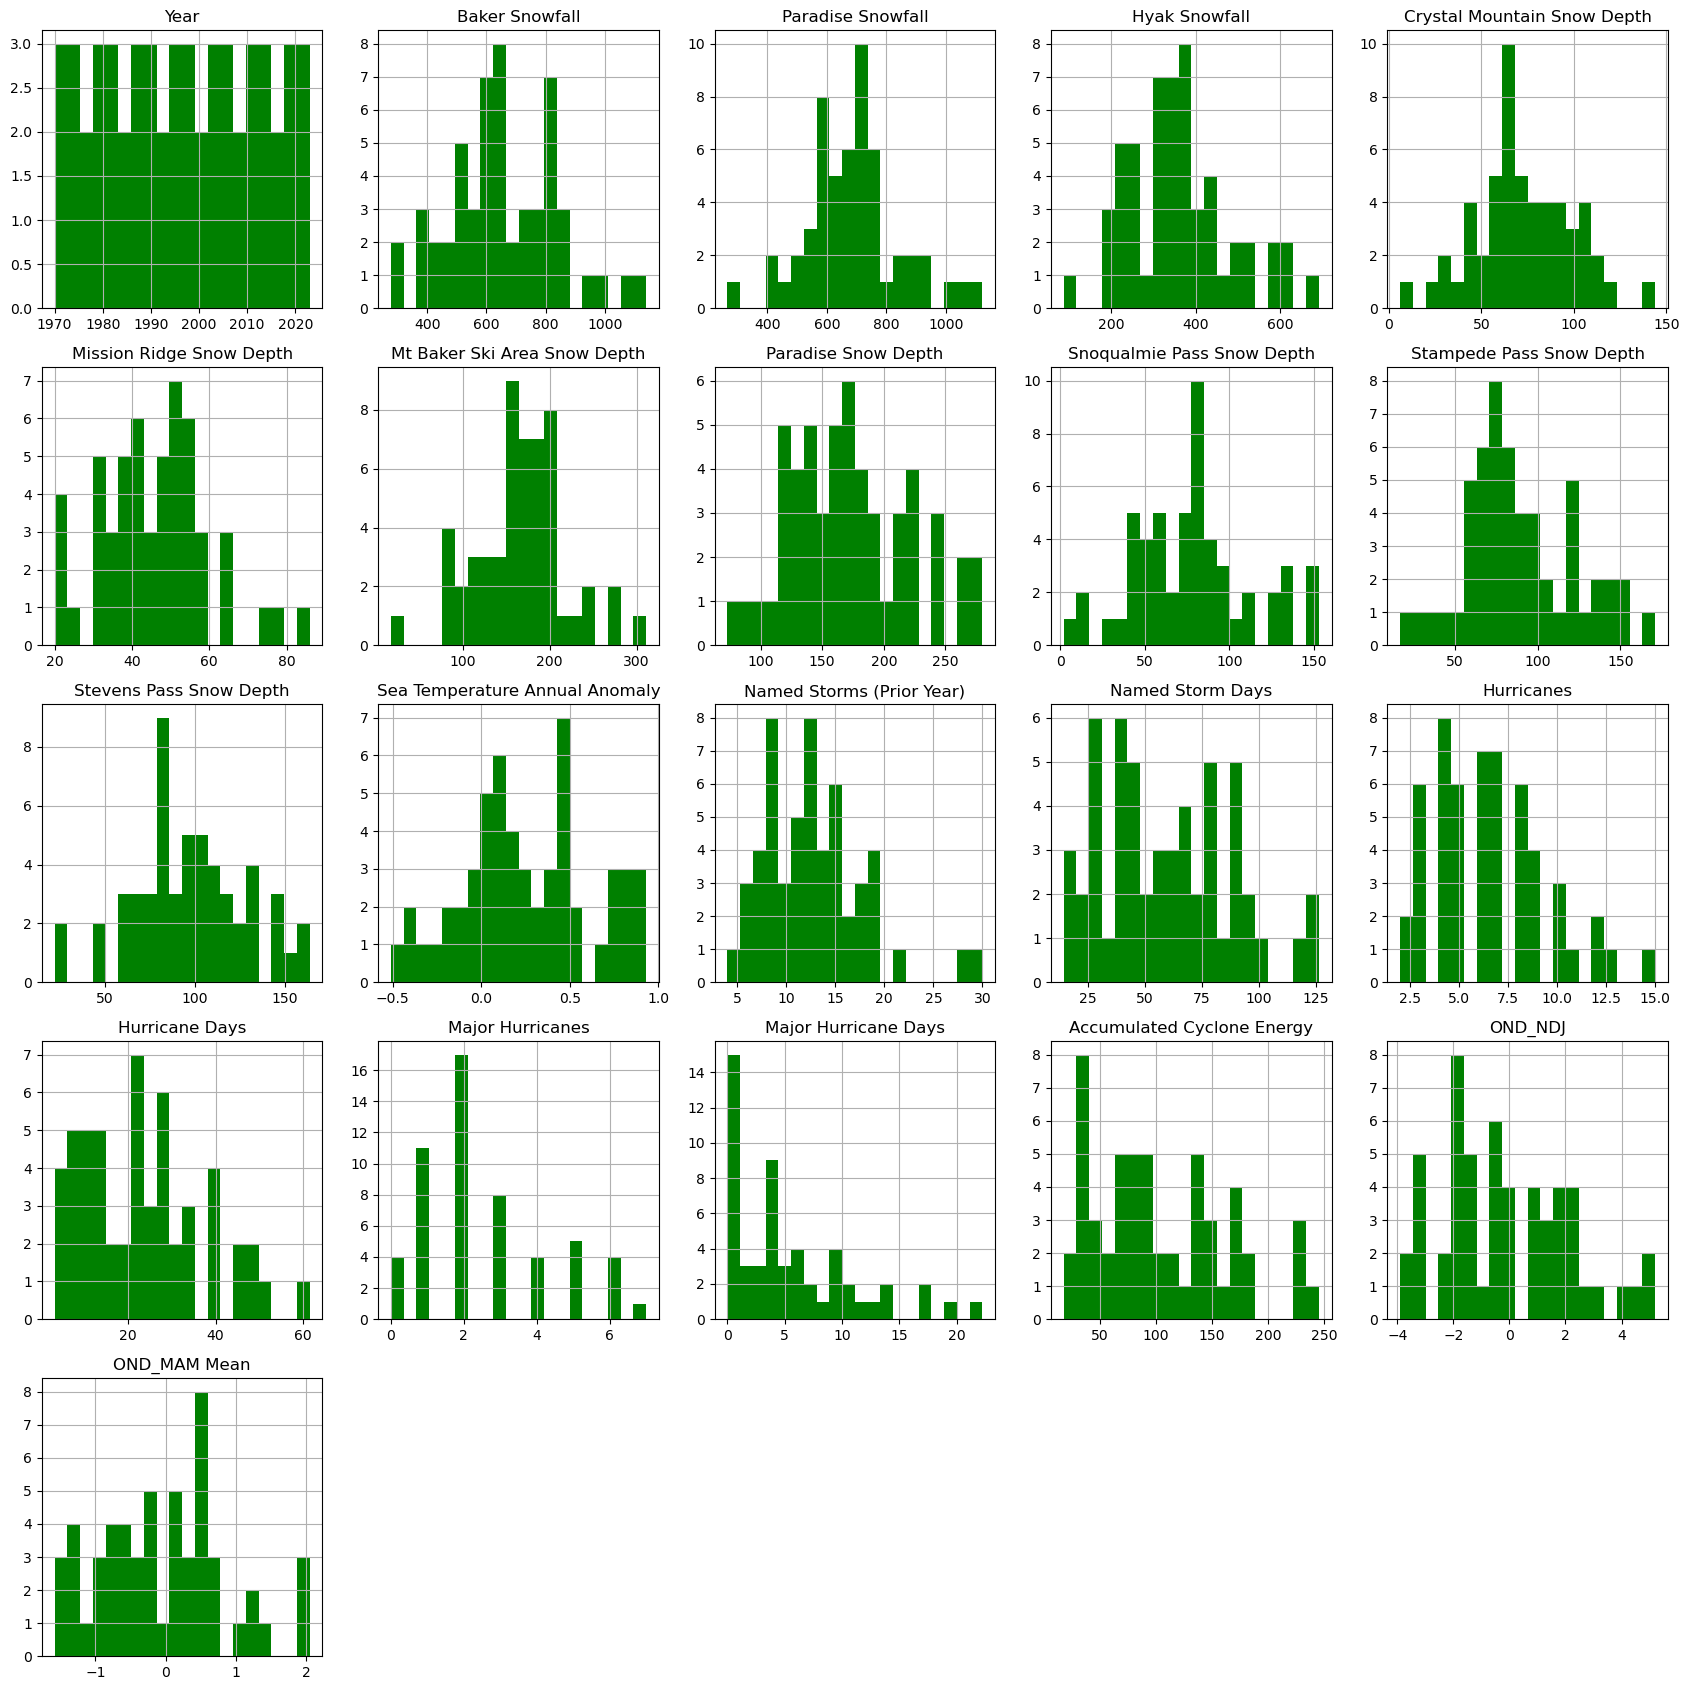

In [8]:
enso.hist(figsize = (17, 17), bins = 20, color = 'green')
plt.tight_layout()
plt.show()

#### 1. Has annual snowfall and or snow depth been significantly decreasing since 1970?

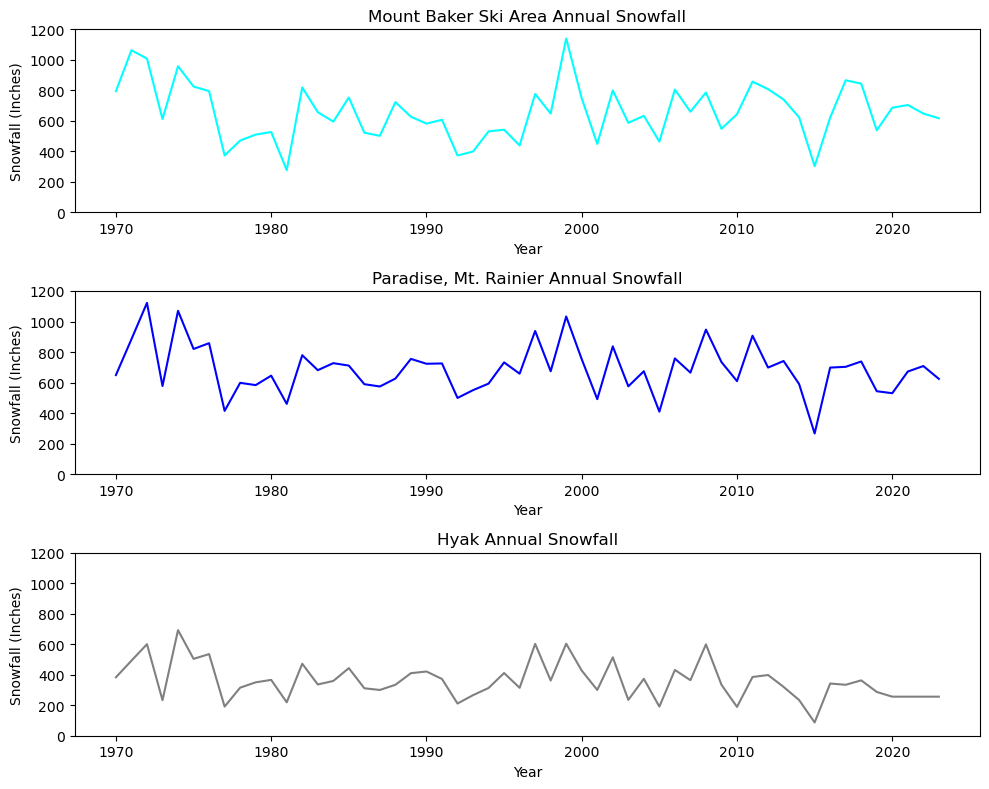

In [11]:
fig, axs = plt.subplots(3, 1) # Three rows 1 column

enso.plot(y = 'Baker Snowfall', x = 'Year',
          ylabel = 'Snowfall (Inches)', legend = False, color = 'aqua', figsize = (10, 8), ax = axs[0])

axs[0].set_title('Mount Baker Ski Area Annual Snowfall')
axs[0].set_ylim(0, 1200)

enso.plot(y = 'Paradise Snowfall', x = 'Year',
          ylabel = 'Snowfall (Inches)', legend = False, color = 'blue', figsize = (10, 8), ax = axs[1])

axs[1].set_title('Paradise, Mt. Rainier Annual Snowfall')
axs[1].set_ylim(0, 1200)

enso.plot(y = 'Hyak Snowfall', x = 'Year',
          ylabel = 'Snowfall (Inches)', legend = False, color = 'grey', figsize = (10, 8), ax = axs[2])

axs[2].set_title('Hyak Annual Snowfall')
axs[2].set_ylim(0, 1200)
 

plt.tight_layout()
# plt.savefig(r"annual_snowfall_history.png")
plt.show()


#### Insights:
* For all three areas, there have been several cycles of heavy snowfall years followed by low snowfall years.
* There does appear to be a slight downward trend since 1970 for all three areas.
* There is a spike in annual snowfall around the late 1990s most notably at the Mount Baker Ski Area.
* The 1998-1999 season was a record snowfall year at Mount Baker Ski area.

In [12]:
# Create a 5-year rolling average column to see if the trends can more clearly be seen
# 1. Create a subset of the dataframe to consist of only the snowfall and depth columns

enso_filtered = enso[['Baker Snowfall', 'Paradise Snowfall', 'Hyak Snowfall', 'Crystal Mountain Snow Depth',
                      'Mission Ridge Snow Depth', 'Mt Baker Ski Area Snow Depth', 'Paradise Snow Depth',
                      'Snoqualmie Pass Snow Depth', 'Stampede Pass Snow Depth', 'Stevens Pass Snow Depth']]

In [13]:
enso_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Baker Snowfall                54 non-null     float64
 1   Paradise Snowfall             54 non-null     float64
 2   Hyak Snowfall                 54 non-null     float64
 3   Crystal Mountain Snow Depth   54 non-null     float64
 4   Mission Ridge Snow Depth      54 non-null     float64
 5   Mt Baker Ski Area Snow Depth  54 non-null     float64
 6   Paradise Snow Depth           54 non-null     float64
 7   Snoqualmie Pass Snow Depth    54 non-null     float64
 8   Stampede Pass Snow Depth      54 non-null     float64
 9   Stevens Pass Snow Depth       54 non-null     float64
dtypes: float64(10)
memory usage: 4.3 KB


In [14]:
snowfall_depth_columns = ['Baker Snowfall', 'Paradise Snowfall', 'Hyak Snowfall', 'Crystal Mountain Snow Depth', 
                         'Mission Ridge Snow Depth', 'Mt Baker Ski Area Snow Depth', 'Paradise Snow Depth',
                         'Snoqualmie Pass Snow Depth', 'Stampede Pass Snow Depth', 'Stevens Pass Snow Depth']
for column in snowfall_depth_columns:
    enso_filtered[f'{column} Rolling Average'] = enso_filtered[column].rolling(window=5).mean()



C:\Users\skilo\AppData\Local\Temp\ipykernel_20676\3130084995.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enso_filtered[f'{column} Rolling Average'] = enso_filtered[column].rolling(window=5).mean()
C:\Users\skilo\AppData\Local\Temp\ipykernel_20676\3130084995.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enso_filtered[f'{column} Rolling Average'] = enso_filtered[column].rolling(window=5).mean()
C:\Users\skilo\AppData\Local\Temp\ipykernel_20676\3130084995.py:5: SettingWithCopyWarning: 
A value is

In [15]:
enso_filtered.head(6)

,Baker Snowfall,Paradise Snowfall,Hyak Snowfall,Crystal Mountain Snow Depth,Mission Ridge Snow Depth,Mt Baker Ski Area Snow Depth,Paradise Snow Depth,Snoqualmie Pass Snow Depth,Stampede Pass Snow Depth,Stevens Pass Snow Depth,Baker Snowfall Rolling Average,Paradise Snowfall Rolling Average,Hyak Snowfall Rolling Average,Crystal Mountain Snow Depth Rolling Average,Mission Ridge Snow Depth Rolling Average,Mt Baker Ski Area Snow Depth Rolling Average,Paradise Snow Depth Rolling Average,Snoqualmie Pass Snow Depth Rolling Average,Stampede Pass Snow Depth Rolling Average,Stevens Pass Snow Depth Rolling Average
0,795.0,649.0,383.0,63.0,30.0,172.5,135.0,78.0,116.0,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1063.0,884.0,492.0,111.0,56.0,268.0,271.0,79.0,171.0,149.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1008.0,1122.0,600.0,89.0,26.0,204.0,268.0,125.0,140.0,133.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,612.0,577.0,233.0,43.0,20.0,141.0,122.0,45.0,66.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,958.0,1070.0,692.0,108.0,52.0,247.0,264.0,153.0,154.0,156.0,887.2,860.4,480.0,82.8,36.8,206.5,212.0,96.0,129.4,120.8
5,825.0,820.0,504.0,106.0,36.0,172.5,223.0,128.0,147.0,134.0,893.2,894.6,504.2,91.4,38.0,206.5,229.6,106.0,135.6,128.0


In [16]:
year_filtered = enso['Year']
year_filtered.head(5)

0    1970
1    1971
2    1972
3    1973
4    1974
Name: Year, dtype: int64

In [17]:
# Merge the two newly created dataframes
enso_rolling_average = pd.concat([year_filtered, enso_filtered], axis = 1)

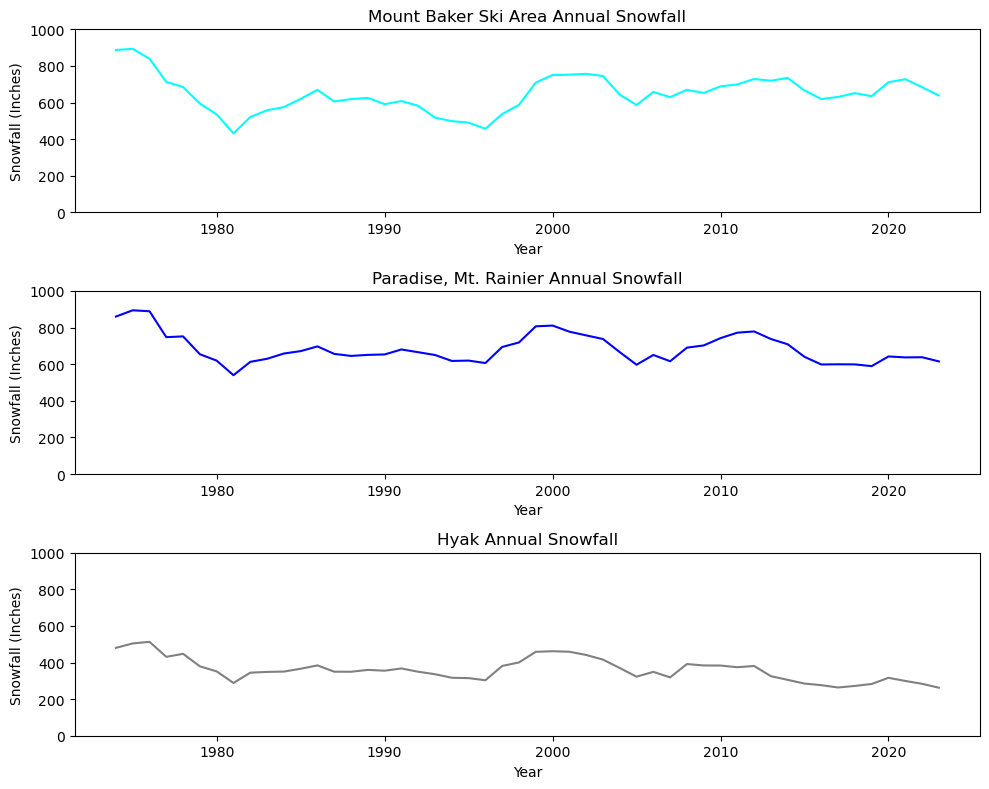

In [18]:
# Plot the snowfall columns to see if the rolling average enables to more easily see trends
fig, axs = plt.subplots(3, 1) # Three rows 1 column

enso_rolling_average.plot(y = 'Baker Snowfall Rolling Average', x = 'Year',
          ylabel = 'Snowfall (Inches)', legend = False, color = 'aqua', figsize = (10, 8), ax = axs[0])

axs[0].set_title('Mount Baker Ski Area Annual Snowfall')
axs[0].set_ylim(0, 1000)

enso_rolling_average.plot(y = 'Paradise Snowfall Rolling Average', x = 'Year',
          ylabel = 'Snowfall (Inches)', legend = False, color = 'blue', figsize = (10, 8), ax = axs[1])

axs[1].set_title('Paradise, Mt. Rainier Annual Snowfall')
axs[1].set_ylim(0, 1000)

enso_rolling_average.plot(y = 'Hyak Snowfall Rolling Average', x = 'Year',
          ylabel = 'Snowfall (Inches)', legend = False, color = 'grey', figsize = (10, 8), ax = axs[2])

axs[2].set_title('Hyak Annual Snowfall')
axs[2].set_ylim(0, 1000)


plt.tight_layout()
 #plt.savefig(r"annual_snowfall_history_rolling_average.png")
plt.show()



#### Insights:
* All areas had the greatest annual snowfall in the early 1970s.
* All aeras have a similar pattern of decreasing snow into the early 1980s holding steady, with a peak in the late 1990s and then followed by a decrease, followed by another increase in snow fall into the late 2000s, peaking in the early to mid 2010s. 
* Subsequent peak snowfall years have decreased from the early 1970s.
* There does appear to be general decrease in snowfall for all areas since 1970.
* From the early 1980s, the Mount Baker ski area seems to show a slight overall upward trend through 2023. 

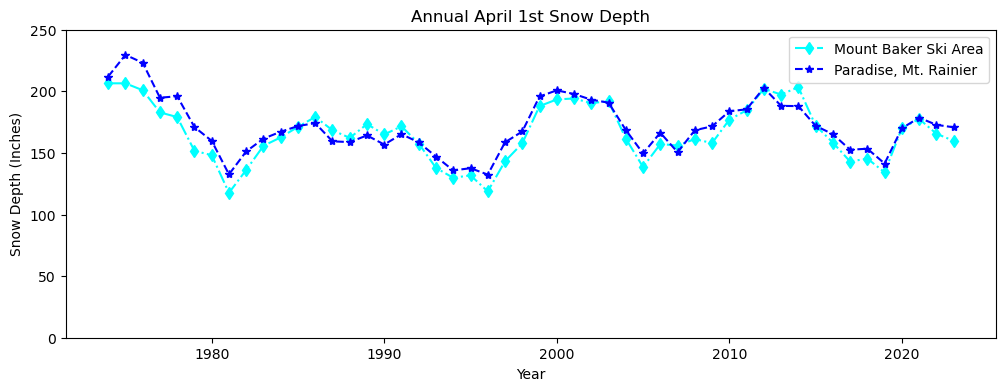

In [19]:
# Comparison of annual April 1st snow depth amounts for the Baker ski area and Paradise, Mt. Rainier

years = enso_rolling_average['Year']

plt.figure(figsize = (12, 4))
plt.plot(years, enso_rolling_average['Mt Baker Ski Area Snow Depth Rolling Average'],
                                    label = 'Mount Baker Ski Area', color = 'aqua', marker = 'd', linestyle = '-.')
plt.plot(years, enso_rolling_average['Paradise Snow Depth Rolling Average'],
                                    label = 'Paradise, Mt. Rainier', color = 'blue', marker = '*', linestyle = '--')

plt.title('Annual April 1st Snow Depth')
plt.xlabel('Year')
plt.ylabel('Snow Depth (Inches)')
 
plt.ylim(0, 250)
plt.legend()
plt.show()

#### Insights:
* Both Paradise and the Mount Baker ski area have nearly identical April 1st snow depth trends.
* Both areas had the greatest snow depth amounts in the early 1970s followed by a decrease into the early 1980s.
* Both areas have subsequent upward and downward trends, with peaks occuring around the late 1990s and early 2010s.
* Subsequent peaks have resulted in as much snow depth as seen in the early 1970s, but the late 1990s and early 2010s peak appear to be nearly the same with the 2010s peak slighly higher than the late 1990s peak. 

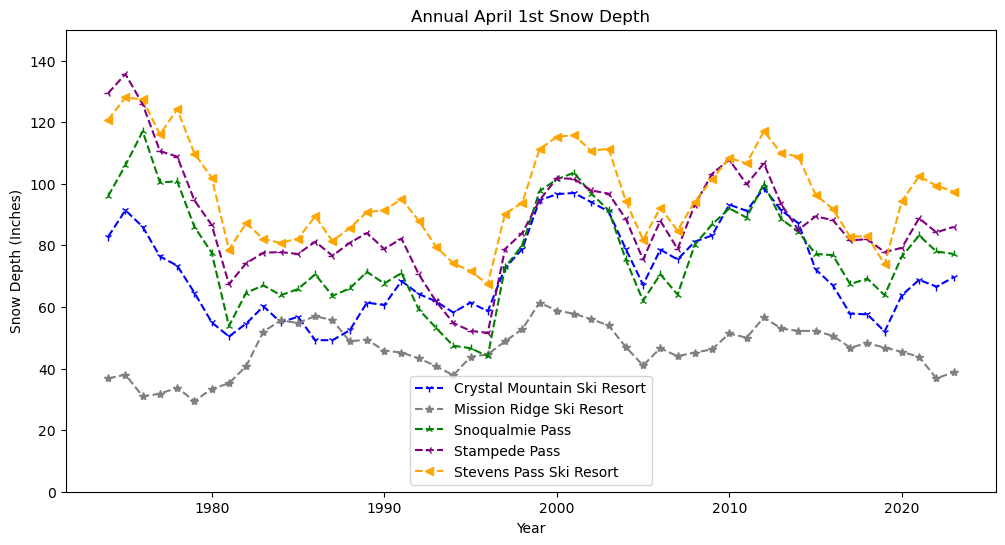

In [20]:

plt.figure(figsize = (12, 6))

plt.plot(years, enso_rolling_average['Crystal Mountain Snow Depth Rolling Average'],
                                    label = 'Crystal Mountain Ski Resort', color = 'blue', marker = '1', linestyle = '--')

plt.plot(years, enso_rolling_average['Mission Ridge Snow Depth Rolling Average'],
                                    label = 'Mission Ridge Ski Resort', color = 'grey', marker = '*', linestyle = '--')

plt.plot(years, enso_rolling_average['Snoqualmie Pass Snow Depth Rolling Average'],
                                    label = 'Snoqualmie Pass', color = 'green', marker = '2', linestyle = '--')

plt.plot(years, enso_rolling_average['Stampede Pass Snow Depth Rolling Average'],
                                    label = 'Stampede Pass', color = 'purple', marker = '3', linestyle = '--')

plt.plot(years, enso_rolling_average['Stevens Pass Snow Depth Rolling Average'],
                                    label = 'Stevens Pass Ski Resort', color = 'orange', marker = '<', linestyle = '--')

plt.title('Annual April 1st Snow Depth')
plt.xlabel('Year')
plt.ylabel('Snow Depth (Inches)')
 
plt.ylim(0, 150)
plt.legend()
plt.show()

#### Insights:
* Areas in the western part of the cascades had the greatest April 1st snow depth during the 1970s, with decreasing trends into the early 1980s, followed by fluctuatons in trends with peaks occurring in the late 1990s to early 2000s and again in the early 2010s.
* Mission Ridge Ski Resort on the eastern side of the Cascade Mountains also has fluctuations in snow depth trends and reaches peak April 1st snow depths in the 1980s, late 1990s, and a smaller peak in the early 2010s.
* All areas generally follow nearly identical fluctuations with the difference between areas being thea actual snowpack measurments.
* Mission Ridge has sligtly different fluctuation patterns. This could be due in part to being on the eastern side of the Cascades which depending on location has different weather patterns then areas on the western side.
* Differences in snowpack could be due to elevation levels and or location. 
* Areas with higher elevation tend to have higher snowfall resulting in higher snowpack amounts.
* Northern areas also appear to receive more snowfall resulting in higher snowpack amounts. 

#### Deeper dive analysis on question 1:
* How do snowfall and snow depth trends differ by ENSO weather pattern?
1. Has snowfall and depth increased or decrease during El Niño winter seasons?
2. Has snowfall and depth increased or decrease during La Niña winter seasons?
3. How about the trends for neutral winter seasons?

#### 1. Has snowfall and depth increased or decreased during El Niño winter seasons? 

In [21]:
# Create filtered DataFrame of only the years with an El Niño winter
el_nino = enso[enso['ENSO Category'] == 'El Niño'].reset_index(drop = True)
el_nino.head(5)

,Year,Baker Snowfall,Paradise Snowfall,Hyak Snowfall,Crystal Mountain Snow Depth,Mission Ridge Snow Depth,Mt Baker Ski Area Snow Depth,Paradise Snow Depth,Snoqualmie Pass Snow Depth,Stampede Pass Snow Depth,Stevens Pass Snow Depth,Sea Temperature Annual Anomaly,Named Storms (Prior Year),Named Storm Days,Hurricanes,Hurricane Days,Major Hurricanes,Major Hurricane Days,Accumulated Cyclone Energy,OND_NDJ,OND_MAM Mean,Decade,Winter/Spring ENSO,ENSO Category,Annual Anomaly Category
0,1973,612.0,577.0,233.0,43.0,20.0,141.0,122.0,45.0,66.0,68.0,-0.150,7,30.75,3,6.25,0,0.00,35.6,4.2,1.27,1970s,Moderate El Niño,El Niño,Slightly Below Average
1,1977,373.0,414.0,191.0,41.0,30.0,114.0,126.0,42.0,64.0,76.0,-0.078,10,49.50,6,25.50,2,1.00,84.2,1.7,0.58,1970s,Weak El Niño,El Niño,Slightly Below Average
2,1983,657.0,681.0,336.0,56.0,86.0,220.0,180.0,59.0,74.0,83.0,0.138,6,18.50,2,5.75,1,1.25,31.5,4.4,1.88,1980s,Strong El Niño,El Niño,Slightly Above Average
3,1987,502.0,574.0,300.0,62.0,51.5,153.0,145.0,61.0,75.0,79.0,0.210,6,23.25,4,10.50,0,0.00,35.8,2.3,1.12,1980s,Moderate El Niño,El Niño,Slightly Above Average
4,1988,723.0,626.0,334.0,72.0,51.5,189.0,177.0,71.0,95.0,104.0,0.138,7,37.25,3,5.00,1,0.50,34.4,2.4,0.58,1980s,Weak El Niño,El Niño,Slightly Above Average


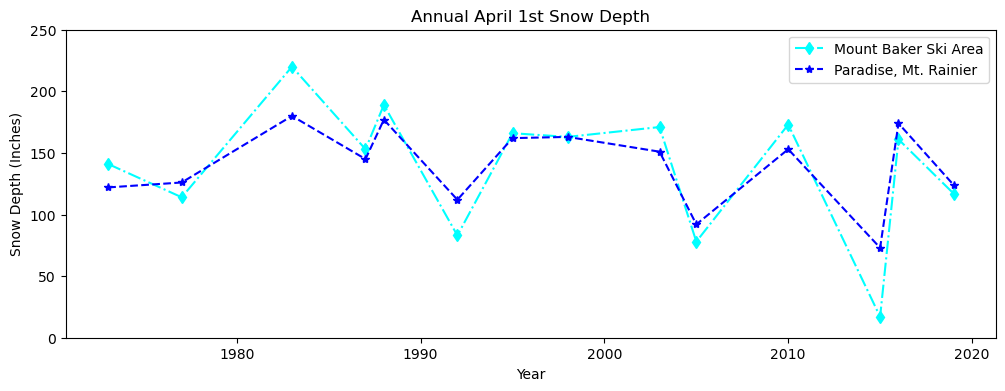

In [22]:
# Create a plot to see if using a rolling average would enable to see clearer trends

el_nino_years = el_nino['Year']

plt.figure(figsize = (12, 4))
plt.plot(el_nino_years, el_nino['Mt Baker Ski Area Snow Depth'],
                                    label = 'Mount Baker Ski Area', color = 'aqua', marker = 'd', linestyle = '-.')
plt.plot(el_nino_years, el_nino['Paradise Snow Depth'],
                                    label = 'Paradise, Mt. Rainier', color = 'blue', marker = '*', linestyle = '--')

plt.title('Annual April 1st Snow Depth')
plt.xlabel('Year')
plt.ylabel('Snow Depth (Inches)')
 
plt.ylim(0, 250)
plt.legend()
plt.show()

* A 2-year rolling average will be created as it can be hard to observe any general trends from the chart above. 
* There are significant fluctuations in snowfall patterns during El Niño winters. 
* Using a greater rolling average would result in missing 1970s data in some of the groupings.


 

In [23]:
for column in snowfall_depth_columns: # Focus is on the snowfall and depth columns
    el_nino[f'{column} Rolling Average'] = el_nino[column].rolling(window=2).mean()


In [24]:
el_nino.tail()

,Year,Baker Snowfall,Paradise Snowfall,Hyak Snowfall,Crystal Mountain Snow Depth,Mission Ridge Snow Depth,Mt Baker Ski Area Snow Depth,Paradise Snow Depth,Snoqualmie Pass Snow Depth,Stampede Pass Snow Depth,Stevens Pass Snow Depth,Sea Temperature Annual Anomaly,Named Storms (Prior Year),Named Storm Days,Hurricanes,...,OND_MAM Mean,Decade,Winter/Spring ENSO,ENSO Category,Annual Anomaly Category,Baker Snowfall Rolling Average,Paradise Snowfall Rolling Average,Hyak Snowfall Rolling Average,Crystal Mountain Snow Depth Rolling Average,Mission Ridge Snow Depth Rolling Average,Mt Baker Ski Area Snow Depth Rolling Average,Paradise Snow Depth Rolling Average,Snoqualmie Pass Snow Depth Rolling Average,Stampede Pass Snow Depth Rolling Average,Stevens Pass Snow Depth Rolling Average
9,2005,464.0,409.0,191.0,31.0,21.0,78.0,92.0,25.0,35.0,49.0,0.426,15,93.00,9,...,0.57,2000s,Weak El Niño,El Niño,Moderately Above Average,525.5,492.0,213.0,53.5,35.0,124.5,121.5,37.5,53.5,66.5
10,2010,644.0,609.0,189.0,81.0,47.0,173.0,153.0,51.0,58.0,84.0,0.516,9,30.00,3,...,1.15,2010s,Moderate El Niño,El Niño,Highly Above Average,554.0,509.0,190.0,56.0,34.0,125.5,122.5,38.0,46.5,66.5
11,2015,303.0,266.0,87.0,6.0,47.0,17.0,73.0,15.0,80.0,22.0,0.858,8,35.00,6,...,0.58,2010s,Weak El Niño,El Niño,Highly Above Average,473.5,437.5,138.0,43.5,47.0,95.0,113.0,33.0,69.0,53.0
12,2016,622.0,698.0,342.0,71.0,50.0,161.0,174.0,80.0,76.0,85.0,0.930,11,43.50,4,...,2.05,2010s,Very Strong El Niño,El Niño,Highly Above Average,462.5,482.0,214.5,38.5,48.5,89.0,123.5,47.5,78.0,53.5
13,2019,538.0,543.0,287.0,44.0,38.0,117.0,124.0,54.0,64.0,63.0,0.876,15,86.75,8,...,0.75,2010s,Weak El Niño,El Niño,Highly Above Average,580.0,620.5,314.5,57.5,44.0,139.0,149.0,67.0,70.0,74.0


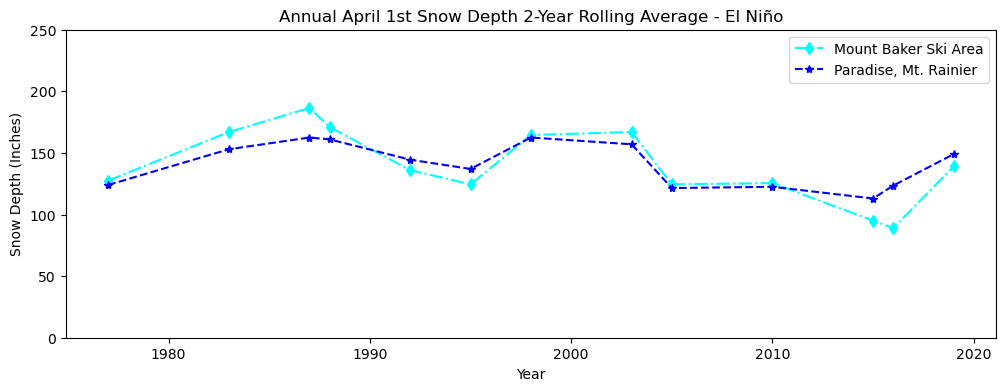

In [25]:
# Baker ski area and Paradise snow depth trends using 2-year rolling average
el_nino_years = el_nino['Year']

plt.figure(figsize = (12, 4))
plt.plot(el_nino_years, el_nino['Mt Baker Ski Area Snow Depth Rolling Average'],
                                    label = 'Mount Baker Ski Area', color = 'aqua', marker = 'd', linestyle = '-.')
plt.plot(el_nino_years, el_nino['Paradise Snow Depth Rolling Average'],
                                    label = 'Paradise, Mt. Rainier', color = 'blue', marker = '*', linestyle = '--')

plt.title('Annual April 1st Snow Depth 2-Year Rolling Average - El Niño')
plt.xlabel('Year')
plt.ylabel('Snow Depth (Inches)')
 
plt.ylim(0, 250)
plt.legend()
plt.show()

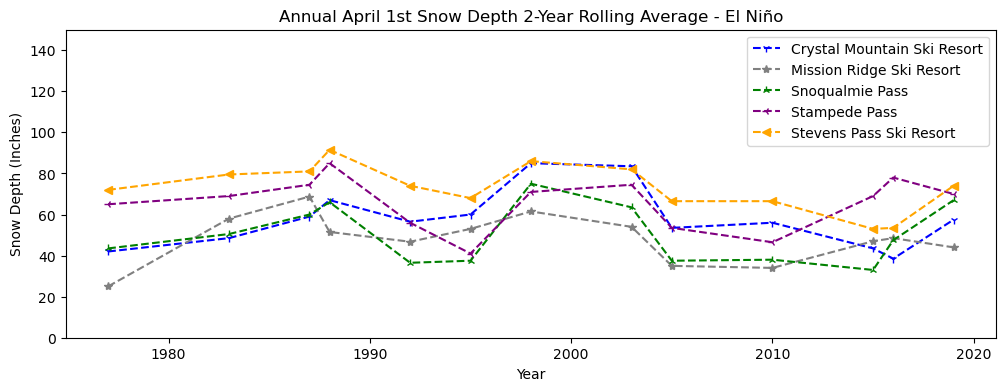

In [26]:
# Charting the other area snow depths 

plt.figure(figsize = (12, 4))
plt.plot(el_nino_years, el_nino['Crystal Mountain Snow Depth Rolling Average'],
                                    label = 'Crystal Mountain Ski Resort', color = 'blue', marker = '1', linestyle = '--')

plt.plot(el_nino_years, el_nino['Mission Ridge Snow Depth Rolling Average'],
                                    label = 'Mission Ridge Ski Resort', color = 'grey', marker = '*', linestyle = '--')

plt.plot(el_nino_years, el_nino['Snoqualmie Pass Snow Depth Rolling Average'],
                                    label = 'Snoqualmie Pass', color = 'green', marker = '2', linestyle = '--')

plt.plot(el_nino_years, el_nino['Stampede Pass Snow Depth Rolling Average'],
                                    label = 'Stampede Pass', color = 'purple', marker = '3', linestyle = '--')

plt.plot(el_nino_years, el_nino['Stevens Pass Snow Depth Rolling Average'],
                                    label = 'Stevens Pass Ski Resort', color = 'orange', marker = '<', linestyle = '--')

plt.title('Annual April 1st Snow Depth 2-Year Rolling Average - El Niño')
plt.xlabel('Year')
plt.ylabel('Snow Depth (Inches)')
 
plt.ylim(0, 150)
plt.legend()
plt.show()

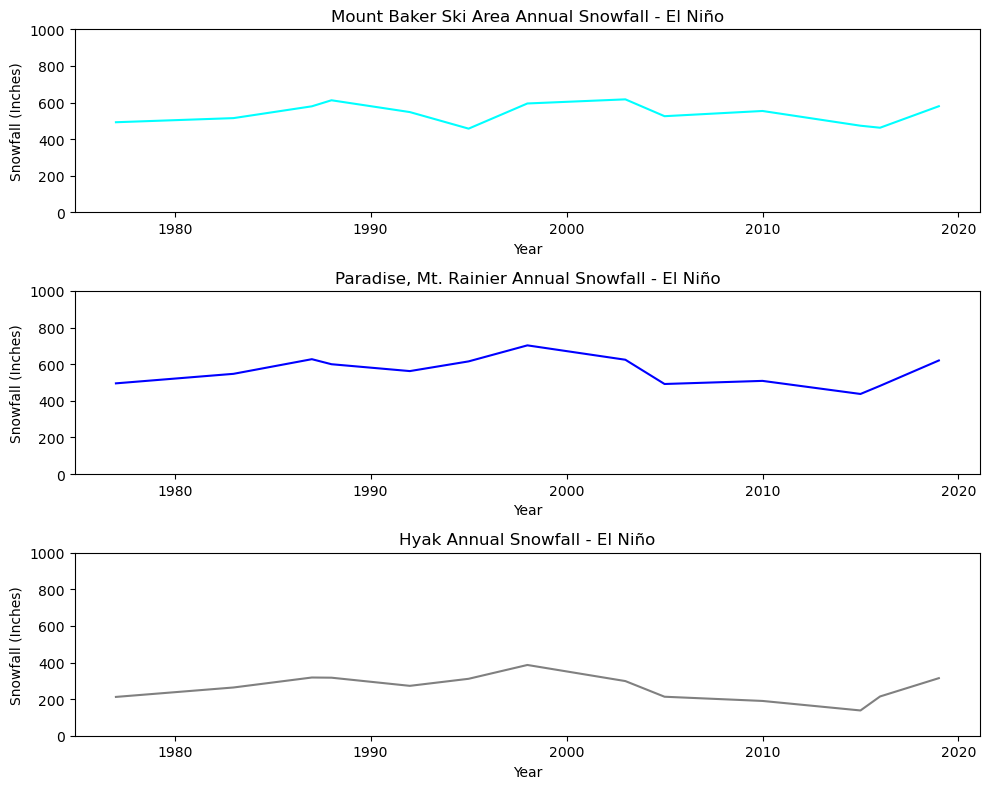

In [27]:
# El Niño snowfall years
fig, axs = plt.subplots(3, 1) # Three rows 1 column

el_nino.plot(y = 'Baker Snowfall Rolling Average', x = 'Year',
          ylabel = 'Snowfall (Inches)', legend = False, color = 'aqua', figsize = (10, 8), ax = axs[0])

axs[0].set_title('Mount Baker Ski Area Annual Snowfall - El Niño')
axs[0].set_ylim(0, 1000)

el_nino.plot(y = 'Paradise Snowfall Rolling Average', x = 'Year',
          ylabel = 'Snowfall (Inches)', legend = False, color = 'blue', figsize = (10, 8), ax = axs[1])

axs[1].set_title('Paradise, Mt. Rainier Annual Snowfall - El Niño')
axs[1].set_ylim(0, 1000)

el_nino.plot(y = 'Hyak Snowfall Rolling Average', x = 'Year',
          ylabel = 'Snowfall (Inches)', legend = False, color = 'grey', figsize = (10, 8), ax = axs[2])

axs[2].set_title('Hyak Annual Snowfall - El Niño')
axs[2].set_ylim(0, 1000)
 

plt.tight_layout()
# plt.savefig(r"annual_snowfall_history.png")
plt.show()

* Create the same charts of La Niña winter seasons

In [28]:
la_nina = enso[enso['ENSO Category'].str.contains('Niña')].reset_index(drop = True)
la_nina['ENSO Category'].unique()

array(['La Niña'], dtype=object)

In [29]:
# Create a la Niña years list to be used in creating the 2-year rolling averages.
la_nina_years = la_nina['Year']
la_nina_years

0     1971
1     1974
2     1975
3     1976
4     1984
5     1985
6     1989
7     1996
8     1999
9     2000
10    2001
11    2006
12    2008
13    2009
14    2011
15    2012
16    2018
17    2021
18    2022
Name: Year, dtype: int64

In [30]:
# Create the two-year rolling average for snowfall and depth colunns
for column in snowfall_depth_columns:
    la_nina[f'{column} Rolling Average'] = la_nina[column].rolling(window = 2).mean() 

In [31]:
la_nina.tail()

,Year,Baker Snowfall,Paradise Snowfall,Hyak Snowfall,Crystal Mountain Snow Depth,Mission Ridge Snow Depth,Mt Baker Ski Area Snow Depth,Paradise Snow Depth,Snoqualmie Pass Snow Depth,Stampede Pass Snow Depth,Stevens Pass Snow Depth,Sea Temperature Annual Anomaly,Named Storms (Prior Year),Named Storm Days,Hurricanes,...,OND_MAM Mean,Decade,Winter/Spring ENSO,ENSO Category,Annual Anomaly Category,Baker Snowfall Rolling Average,Paradise Snowfall Rolling Average,Hyak Snowfall Rolling Average,Crystal Mountain Snow Depth Rolling Average,Mission Ridge Snow Depth Rolling Average,Mt Baker Ski Area Snow Depth Rolling Average,Paradise Snow Depth Rolling Average,Snoqualmie Pass Snow Depth Rolling Average,Stampede Pass Snow Depth Rolling Average,Stevens Pass Snow Depth Rolling Average
14,2011,857.0,907.0,385.0,97.0,58.0,230.0,208.0,82.0,82.0,108.0,0.318,19,89.50,12,...,-1.23,2010s,Moderate La Niña,La Niña,Moderately Above Average,702.5,820.5,359.5,95.0,53.5,186.5,196.5,92.0,104.5,111.5
15,2012,808.0,698.0,398.0,117.0,74.0,267.0,228.0,134.0,122.0,147.0,0.444,19,89.75,7,...,-0.80,2010s,Weak La Niña,La Niña,Moderately Above Average,832.5,802.5,391.5,107.0,66.0,248.5,218.0,108.0,102.0,127.5
16,2018,844.0,738.0,363.0,68.0,44.0,186.0,171.0,83.0,80.0,97.0,0.732,17,93.00,10,...,-0.80,2010s,Weak La Niña,La Niña,Highly Above Average,826.0,718.0,380.5,92.5,59.0,226.5,199.5,108.5,101.0,122.0
17,2021,704.0,672.0,256.0,96.0,42.0,199.0,217.0,114.0,124.0,125.0,0.805,30,118.00,13,...,-0.98,2020s,Weak La Niña,La Niña,Highly Above Average,774.0,705.0,309.5,82.0,43.0,192.5,194.0,98.5,102.0,111.0
18,2022,648.0,708.0,256.0,60.0,20.0,130.0,136.0,61.0,66.0,87.0,0.772,21,79.00,7,...,-1.00,2020s,Moderate La Niña,La Niña,Highly Above Average,676.0,690.0,256.0,78.0,31.0,164.5,176.5,87.5,95.0,106.0


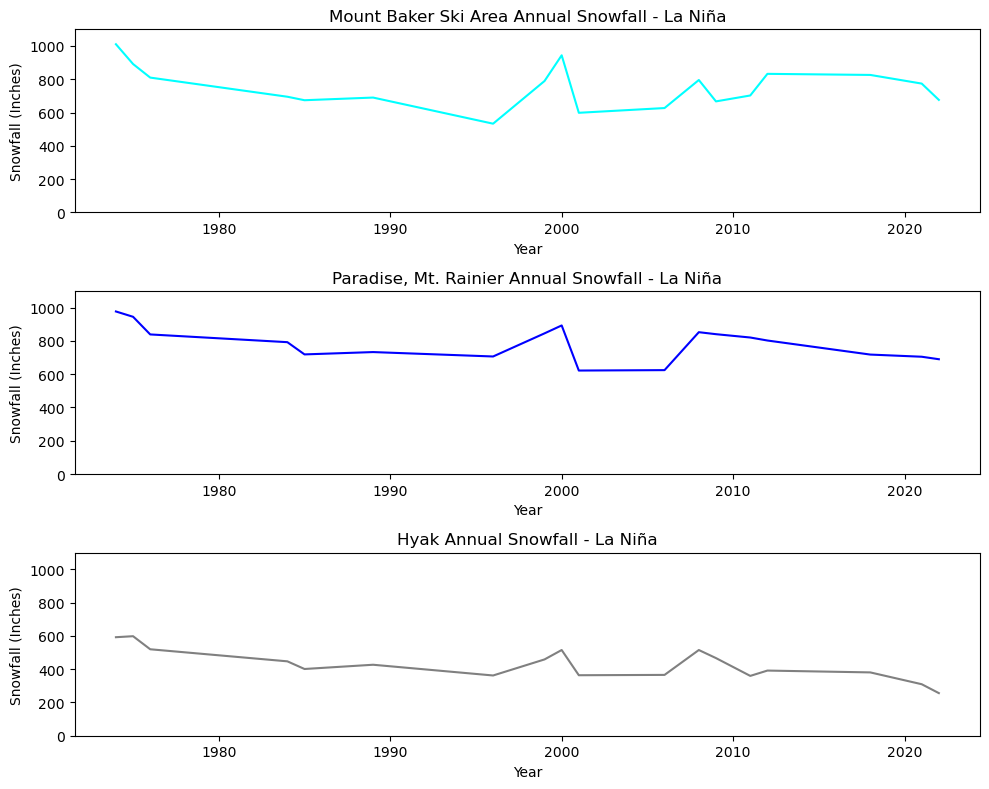

In [32]:
# La Niña winter snowfall seasons
fig, axs = plt.subplots(3, 1) # Three rows 1 column

la_nina.plot(y = 'Baker Snowfall Rolling Average', x = 'Year',
          ylabel = 'Snowfall (Inches)', legend = False, color = 'aqua', figsize = (10, 8), ax = axs[0])

axs[0].set_title('Mount Baker Ski Area Annual Snowfall - La Niña')
axs[0].set_ylim(0, 1100)

la_nina.plot(y = 'Paradise Snowfall Rolling Average', x = 'Year',
          ylabel = 'Snowfall (Inches)', legend = False, color = 'blue', figsize = (10, 8), ax = axs[1])

axs[1].set_title('Paradise, Mt. Rainier Annual Snowfall - La Niña')
axs[1].set_ylim(0, 1100)

la_nina.plot(y = 'Hyak Snowfall Rolling Average', x = 'Year',
          ylabel = 'Snowfall (Inches)', legend = False, color = 'grey', figsize = (10, 8), ax = axs[2])

axs[2].set_title('Hyak Annual Snowfall - La Niña')
axs[2].set_ylim(0, 1100)
 

plt.tight_layout()
# plt.savefig(r"annual_snowfall_history.png")
plt.show()


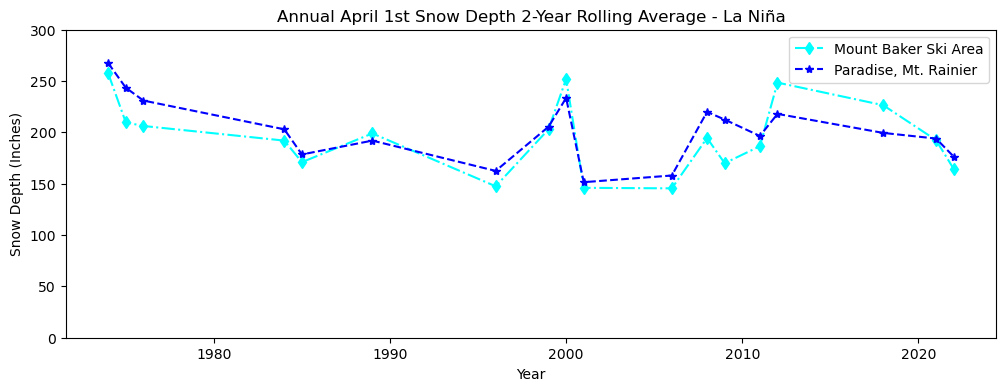

In [33]:
# La Niña Snow Depth amounts
# Baker ski area and Paradise snow depth trends using 2-year rolling average

plt.figure(figsize = (12, 4))
plt.plot(la_nina_years, la_nina['Mt Baker Ski Area Snow Depth Rolling Average'],
                                    label = 'Mount Baker Ski Area', color = 'aqua', marker = 'd', linestyle = '-.')
plt.plot(la_nina_years, la_nina['Paradise Snow Depth Rolling Average'],
                                    label = 'Paradise, Mt. Rainier', color = 'blue', marker = '*', linestyle = '--')

plt.title('Annual April 1st Snow Depth 2-Year Rolling Average - La Niña')
plt.xlabel('Year')
plt.ylabel('Snow Depth (Inches)')
 
plt.ylim(0, 300)
plt.legend()
plt.show()

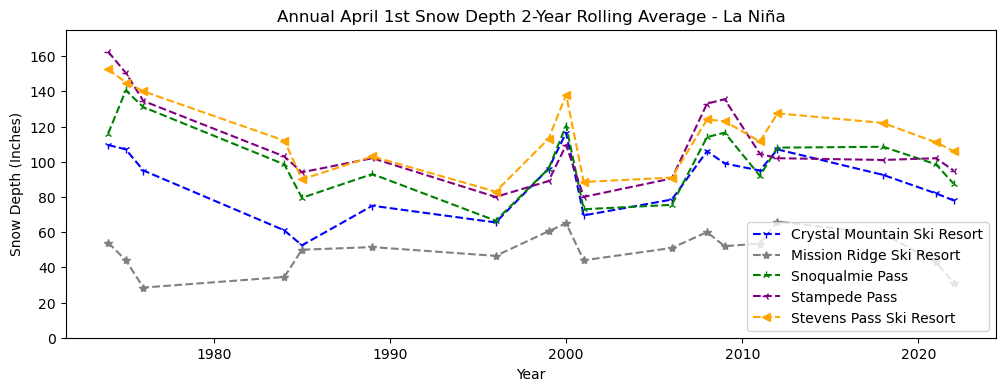

In [34]:
# Charting the other area snow depths 

plt.figure(figsize = (12, 4))
plt.plot(la_nina_years, la_nina['Crystal Mountain Snow Depth Rolling Average'],
                                    label = 'Crystal Mountain Ski Resort', color = 'blue', marker = '1', linestyle = '--')

plt.plot(la_nina_years, la_nina['Mission Ridge Snow Depth Rolling Average'],
                                    label = 'Mission Ridge Ski Resort', color = 'grey', marker = '*', linestyle = '--')

plt.plot(la_nina_years, la_nina['Snoqualmie Pass Snow Depth Rolling Average'],
                                    label = 'Snoqualmie Pass', color = 'green', marker = '2', linestyle = '--')

plt.plot(la_nina_years, la_nina['Stampede Pass Snow Depth Rolling Average'],
                                    label = 'Stampede Pass', color = 'purple', marker = '3', linestyle = '--')

plt.plot(la_nina_years, la_nina['Stevens Pass Snow Depth Rolling Average'],
                                    label = 'Stevens Pass Ski Resort', color = 'orange', marker = '<', linestyle = '--')

plt.title('Annual April 1st Snow Depth 2-Year Rolling Average - La Niña')
plt.xlabel('Year')
plt.ylabel('Snow Depth (Inches)')
 
plt.ylim(0, 175)
plt.legend()
plt.show()

* Follow the same steps as above for neutral winter seasons

In [35]:
# Create a subset of the DataFrame that only includes neutral winter seasons
neutral = enso[enso['ENSO Category'] == 'Neutral'].reset_index(drop = True)
neutral.head()

,Year,Baker Snowfall,Paradise Snowfall,Hyak Snowfall,Crystal Mountain Snow Depth,Mission Ridge Snow Depth,Mt Baker Ski Area Snow Depth,Paradise Snow Depth,Snoqualmie Pass Snow Depth,Stampede Pass Snow Depth,Stevens Pass Snow Depth,Sea Temperature Annual Anomaly,Named Storms (Prior Year),Named Storm Days,Hurricanes,Hurricane Days,Major Hurricanes,Major Hurricane Days,Accumulated Cyclone Energy,OND_NDJ,OND_MAM Mean,Decade,Winter/Spring ENSO,ENSO Category,Annual Anomaly Category
0,1970,795.0,649.0,383.0,63.0,30.0,172.5,135.0,78.0,116.0,98.0,-0.294,18,92.25,12,40.25,5,6.50,165.7,1.4,0.45,1970s,Neutral,Neutral,Moderately Below Average
1,1972,1008.0,1122.0,600.0,89.0,26.0,204.0,268.0,125.0,140.0,133.0,-0.186,13,63.00,6,28.75,1,1.00,96.8,-1.9,-0.42,1970s,Neutral,Neutral,Slightly Below Average
2,1978,471.0,598.0,315.0,28.0,30.0,122.0,128.0,47.0,57.0,109.0,-0.186,6,14.75,5,6.75,1,1.00,25.3,1.6,0.43,1970s,Neutral,Neutral,Slightly Below Average
3,1979,510.0,583.0,350.0,64.0,30.0,110.0,139.0,79.0,83.0,84.0,0.048,12,43.50,5,13.50,2,3.50,63.2,-0.1,0.08,1970s,Neutral,Neutral,Slightly Above Average
4,1980,527.0,645.0,366.0,58.0,56.0,155.0,167.0,86.0,107.0,95.0,0.066,9,45.75,6,21.75,2,5.75,92.9,1.1,0.48,1980s,Neutral,Neutral,Slightly Above Average


In [36]:
# Creating the list to be used for plotting purposes
neutral_years = neutral['Year']

# Create the two-year rolling average column only for snowfall and depth columns
for column in snowfall_depth_columns:
    neutral[f'{column} Rolling Average'] = neutral[column].rolling(window = 2).mean() 
    
neutral.head(6)

,Year,Baker Snowfall,Paradise Snowfall,Hyak Snowfall,Crystal Mountain Snow Depth,Mission Ridge Snow Depth,Mt Baker Ski Area Snow Depth,Paradise Snow Depth,Snoqualmie Pass Snow Depth,Stampede Pass Snow Depth,Stevens Pass Snow Depth,Sea Temperature Annual Anomaly,Named Storms (Prior Year),Named Storm Days,Hurricanes,...,OND_MAM Mean,Decade,Winter/Spring ENSO,ENSO Category,Annual Anomaly Category,Baker Snowfall Rolling Average,Paradise Snowfall Rolling Average,Hyak Snowfall Rolling Average,Crystal Mountain Snow Depth Rolling Average,Mission Ridge Snow Depth Rolling Average,Mt Baker Ski Area Snow Depth Rolling Average,Paradise Snow Depth Rolling Average,Snoqualmie Pass Snow Depth Rolling Average,Stampede Pass Snow Depth Rolling Average,Stevens Pass Snow Depth Rolling Average
0,1970,795.0,649.0,383.0,63.0,30.0,172.5,135.0,78.0,116.0,98.0,-0.294,18,92.25,12,...,0.45,1970s,Neutral,Neutral,Moderately Below Average,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1972,1008.0,1122.0,600.0,89.0,26.0,204.0,268.0,125.0,140.0,133.0,-0.186,13,63.00,6,...,-0.42,1970s,Neutral,Neutral,Slightly Below Average,901.5,885.5,491.5,76.0,28.0,188.25,201.5,101.5,128.0,115.5
2,1978,471.0,598.0,315.0,28.0,30.0,122.0,128.0,47.0,57.0,109.0,-0.186,6,14.75,5,...,0.43,1970s,Neutral,Neutral,Slightly Below Average,739.5,860.0,457.5,58.5,28.0,163.00,198.0,86.0,98.5,121.0
3,1979,510.0,583.0,350.0,64.0,30.0,110.0,139.0,79.0,83.0,84.0,0.048,12,43.50,5,...,0.08,1970s,Neutral,Neutral,Slightly Above Average,490.5,590.5,332.5,46.0,30.0,116.00,133.5,63.0,70.0,96.5
4,1980,527.0,645.0,366.0,58.0,56.0,155.0,167.0,86.0,107.0,95.0,0.066,9,45.75,6,...,0.48,1980s,Neutral,Neutral,Slightly Above Average,518.5,614.0,358.0,61.0,43.0,132.50,153.0,82.5,95.0,89.5
5,1981,277.0,460.0,219.0,61.0,30.0,87.0,103.0,15.0,26.0,29.0,-0.006,11,62.25,9,...,-0.27,1980s,Neutral,Neutral,Slightly Below Average,402.0,552.5,292.5,59.5,43.0,121.00,135.0,50.5,66.5,62.0


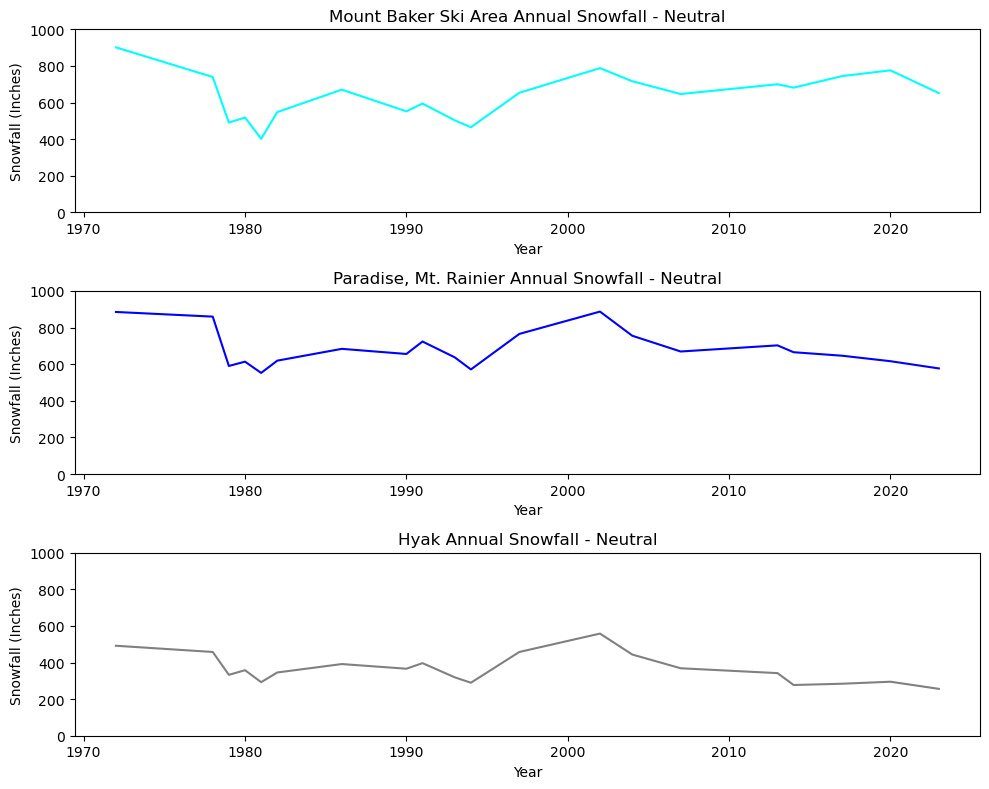

In [37]:
fig, axs = plt.subplots(3, 1) # Three rows 1 column

neutral.plot(y = 'Baker Snowfall Rolling Average', x = 'Year',
          ylabel = 'Snowfall (Inches)', legend = False, color = 'aqua', figsize = (10, 8), ax = axs[0])

axs[0].set_title('Mount Baker Ski Area Annual Snowfall - Neutral')
axs[0].set_ylim(0, 1000)

neutral.plot(y = 'Paradise Snowfall Rolling Average', x = 'Year',
          ylabel = 'Snowfall (Inches)', legend = False, color = 'blue', figsize = (10, 8), ax = axs[1])

axs[1].set_title('Paradise, Mt. Rainier Annual Snowfall - Neutral')
axs[1].set_ylim(0, 1000)

neutral.plot(y = 'Hyak Snowfall Rolling Average', x = 'Year',
          ylabel = 'Snowfall (Inches)', legend = False, color = 'grey', figsize = (10, 8), ax = axs[2])

axs[2].set_title('Hyak Annual Snowfall - Neutral')
axs[2].set_ylim(0, 1000)


plt.tight_layout()
# plt.savefig(r"annual_snowfall_history_rolling_average.png")
plt.show()


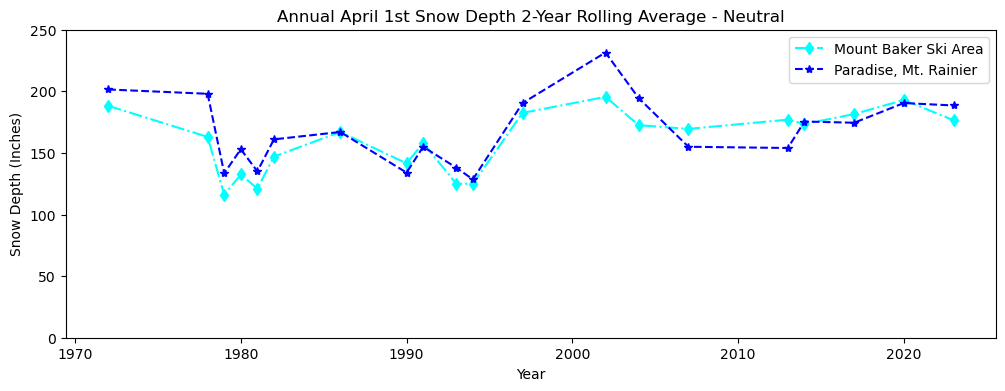

In [38]:
# Neutral winter snow depth amounts
# Baker ski area and Paradise snow depth trends using 2-year rolling average

plt.figure(figsize = (12, 4))
plt.plot(neutral_years, neutral['Mt Baker Ski Area Snow Depth Rolling Average'],
                                    label = 'Mount Baker Ski Area', color = 'aqua', marker = 'd', linestyle = '-.')
plt.plot(neutral_years, neutral['Paradise Snow Depth Rolling Average'],
                                    label = 'Paradise, Mt. Rainier', color = 'blue', marker = '*', linestyle = '--')

plt.title('Annual April 1st Snow Depth 2-Year Rolling Average - Neutral')
plt.xlabel('Year')
plt.ylabel('Snow Depth (Inches)')
 
plt.ylim(0, 250)
plt.legend()
plt.show()

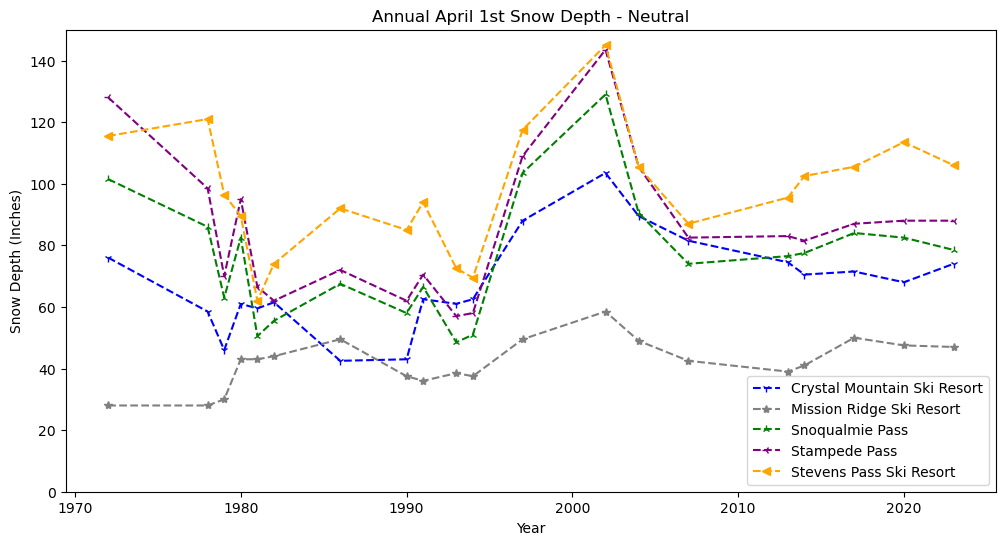

In [39]:
plt.figure(figsize = (12, 6))

plt.plot(neutral_years, neutral['Crystal Mountain Snow Depth Rolling Average'],
                                    label = 'Crystal Mountain Ski Resort', color = 'blue', marker = '1', linestyle = '--')

plt.plot(neutral_years, neutral['Mission Ridge Snow Depth Rolling Average'],
                                    label = 'Mission Ridge Ski Resort', color = 'grey', marker = '*', linestyle = '--')

plt.plot(neutral_years, neutral['Snoqualmie Pass Snow Depth Rolling Average'],
                                    label = 'Snoqualmie Pass', color = 'green', marker = '2', linestyle = '--')

plt.plot(neutral_years, neutral['Stampede Pass Snow Depth Rolling Average'],
                                    label = 'Stampede Pass', color = 'purple', marker = '3', linestyle = '--')

plt.plot(neutral_years, neutral['Stevens Pass Snow Depth Rolling Average'],
                                    label = 'Stevens Pass Ski Resort', color = 'orange', marker = '<', linestyle = '--')

plt.title('Annual April 1st Snow Depth - Neutral')
plt.xlabel('Year')
plt.ylabel('Snow Depth (Inches)')
 
plt.ylim(0, 150)
plt.legend()
plt.show()

#### Key insights:
* Observations base on neutral winters demonsrate reaching a peack April 1st snowpack amount in the late 1990s to early 2000s. The fact that the 1998-1999 winter season was a huge snowfall year and a record breaking year at Mount Baker Ski Area is why there is a peak during this time frame.
* All areas above show fluctuations with peaks in the early 1970s, with downward trends into the late 1970s and early 1980s with fluctuating trends up until he late 1990s early 2000s peak, followed by another downward trend. 
* The one exception is Missin Ridge Ski Resort which shows a steady trend up until about 1980 and then reaching a peak in the late 1980s, followed by a decreasing trend and then reaching its highest peak in the early 2000s. 
* Stevens Pass Ski Resort had the highest snowpack amount during most of the time period compared to the other areas illustrated above for April 1st snowpack.
* Mission Ridge Ski Resort had the lowest snowpack amount. Areas on the eastern side of the Cascades typically receivve less snow than areas on the west side of the Cascades. 

* Considering that the Mount Baker ski area and Paradise are either on or near a major volcano, and that the surrounding mountain/s can heavily influence the weather, three other areas will be used to compare the trends between the three different ENSO weather patterns: El Niño, La Niña, and neutral winters along with the chart combining the three.
* Areas with time series plots will include:
    * Mount Baker Ski Area
    * Stevens Pass (Elevation 4,062 feet)
    * Snoqualmie Pass (Elevation 3,022 feet)
    * Mission Ridge (Elevation, 4,570 feet) Note: It is on the eastern side of the Cascades. Eestern Cascade mountains typically receive less snow than mountains on the west side. 
* The charts below will illustrate April 1st snowpack amount based on the ENSO winter weather pattern for each area for clearer illustration purposes. 

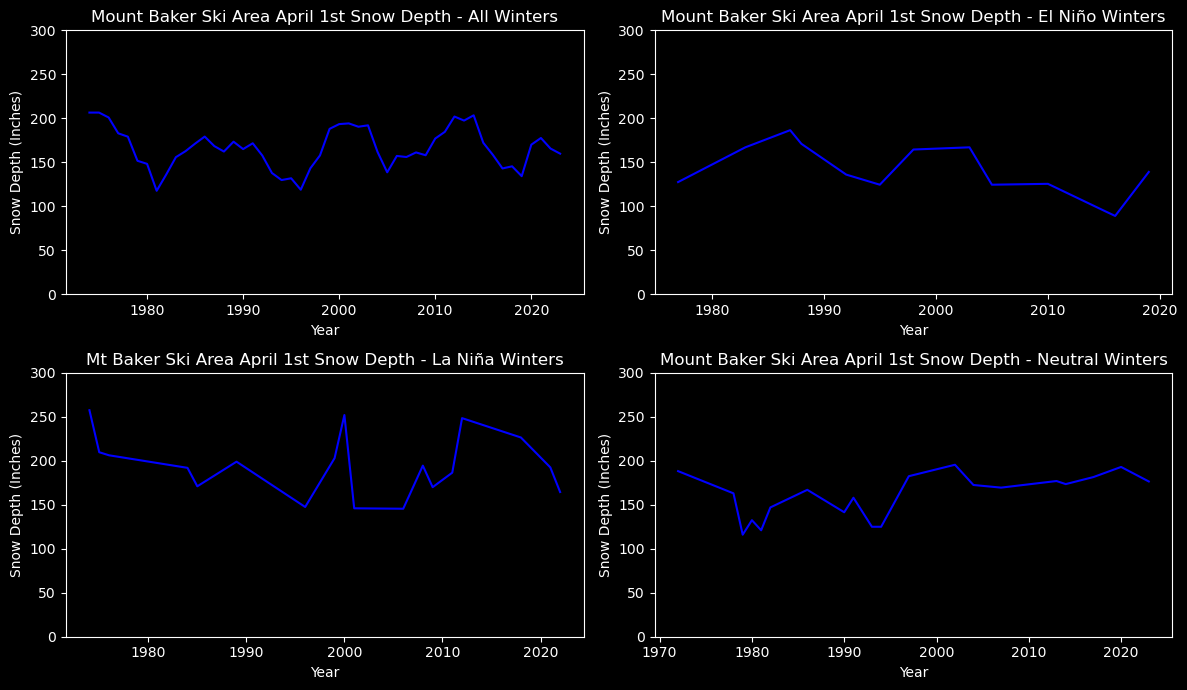

In [40]:
# Mount Baker Ski Area snow depth plots

plt.style.use('dark_background')
fig, axs = plt.subplots(2, 2, figsize = (12, 7)) # Two rows, 2 columns

# Plot for all winters
enso_rolling_average.plot(y = 'Mt Baker Ski Area Snow Depth Rolling Average', x = 'Year',
                                    ylabel = 'Snow Depth (Inches)', legend = False, color = 'blue', ax = axs[0,0])

axs[0,0].set_title('Mount Baker Ski Area April 1st Snow Depth - All Winters')
axs[0,0].set_ylim(0, 300)

# Plot for El Niño winters 
el_nino.plot(y = 'Mt Baker Ski Area Snow Depth Rolling Average', x='Year',
             ylabel = 'Snow Depth (Inches)', legend = False, color = 'blue', ax = axs[0, 1])

axs[0, 1].set_title('Mount Baker Ski Area April 1st Snow Depth - El Niño Winters')
axs[0, 1].set_ylim(0, 300)

# Plot for La Niña winters
la_nina.plot(y = 'Mt Baker Ski Area Snow Depth Rolling Average', x ='Year',
              ylabel = 'Snow Depth (Inches)', legend = False, color ='blue', ax = axs[1, 0])

axs[1, 0].set_title('Mt Baker Ski Area April 1st Snow Depth - La Niña Winters')
axs[1, 0].set_ylim(0, 300)

# Plot for neutral winters
neutral.plot(y = 'Mt Baker Ski Area Snow Depth Rolling Average', x = 'Year',
            ylabel = 'Snow Depth (Inches)', legend = False, color = 'blue', ax = axs[1, 1] )

axs[1, 1].set_title('Mount Baker Ski Area April 1st Snow Depth - Neutral Winters') 
axs[1, 1].set_ylim(0, 300)
plt.tight_layout()
# plt.savefig(r'Mount Baker Ski Area Snow Depth Trends by ENSO')
plt.show()
 

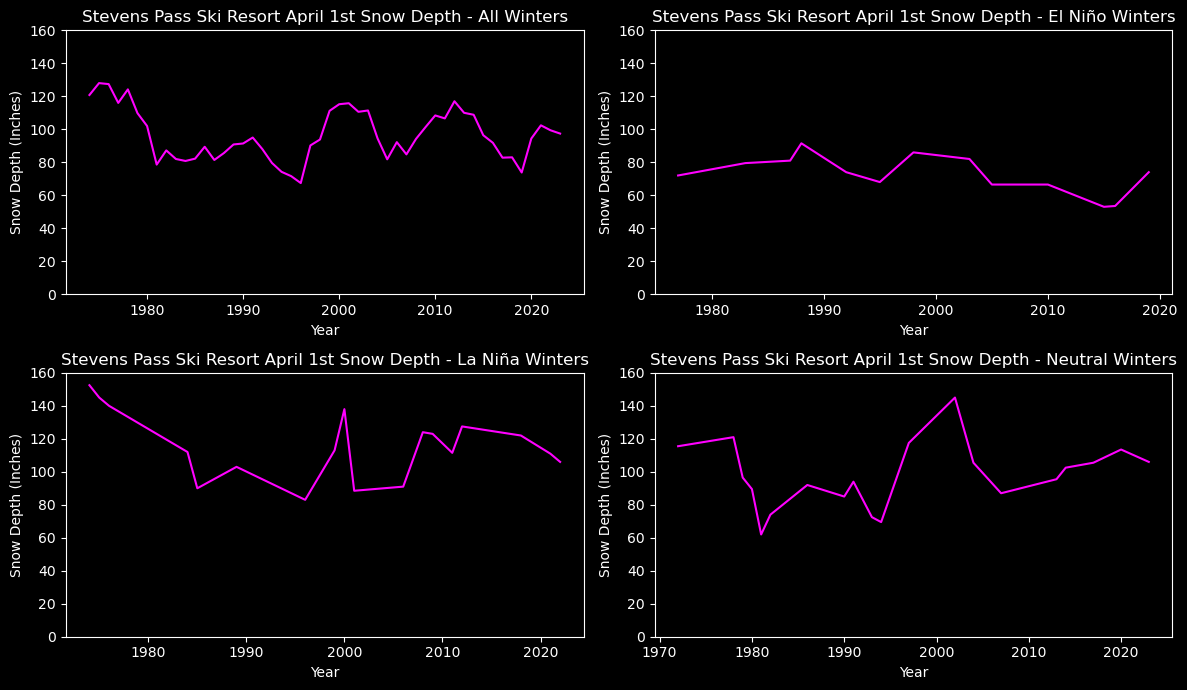

In [41]:
# Stevens Pass Ski Resort snow Depths

fig, axs = plt.subplots(2, 2, figsize = (12, 7)) # Two rows, 2 columns

# Plot for all winters
enso_rolling_average.plot(y = 'Stevens Pass Snow Depth Rolling Average', x = 'Year',
                                    ylabel = 'Snow Depth (Inches)', legend = False, color = 'magenta', ax = axs[0,0])

axs[0,0].set_title('Stevens Pass Ski Resort April 1st Snow Depth - All Winters')
axs[0,0].set_ylim(0, 160)

# Plot for El Niño winters 
el_nino.plot(y = 'Stevens Pass Snow Depth Rolling Average', x='Year',
             ylabel = 'Snow Depth (Inches)', legend = False, color = 'magenta', ax = axs[0, 1])

axs[0, 1].set_title('Stevens Pass Ski Resort April 1st Snow Depth - El Niño Winters')
axs[0, 1].set_ylim(0, 160)

# Plot for La Niña winters
la_nina.plot(y = 'Stevens Pass Snow Depth Rolling Average', x ='Year',
              ylabel = 'Snow Depth (Inches)', legend = False, color ='magenta', ax = axs[1, 0])

axs[1, 0].set_title('Stevens Pass Ski Resort April 1st Snow Depth - La Niña Winters')
axs[1, 0].set_ylim(0, 160)

# Plot for neutral winters
neutral.plot(y = 'Stevens Pass Snow Depth Rolling Average', x = 'Year',
            ylabel = 'Snow Depth (Inches)', legend = False, color = 'magenta', ax = axs[1, 1] )

axs[1, 1].set_title('Stevens Pass Ski Resort April 1st Snow Depth - Neutral Winters') 
axs[1, 1].set_ylim(0, 160)
plt.tight_layout()
plt.show()

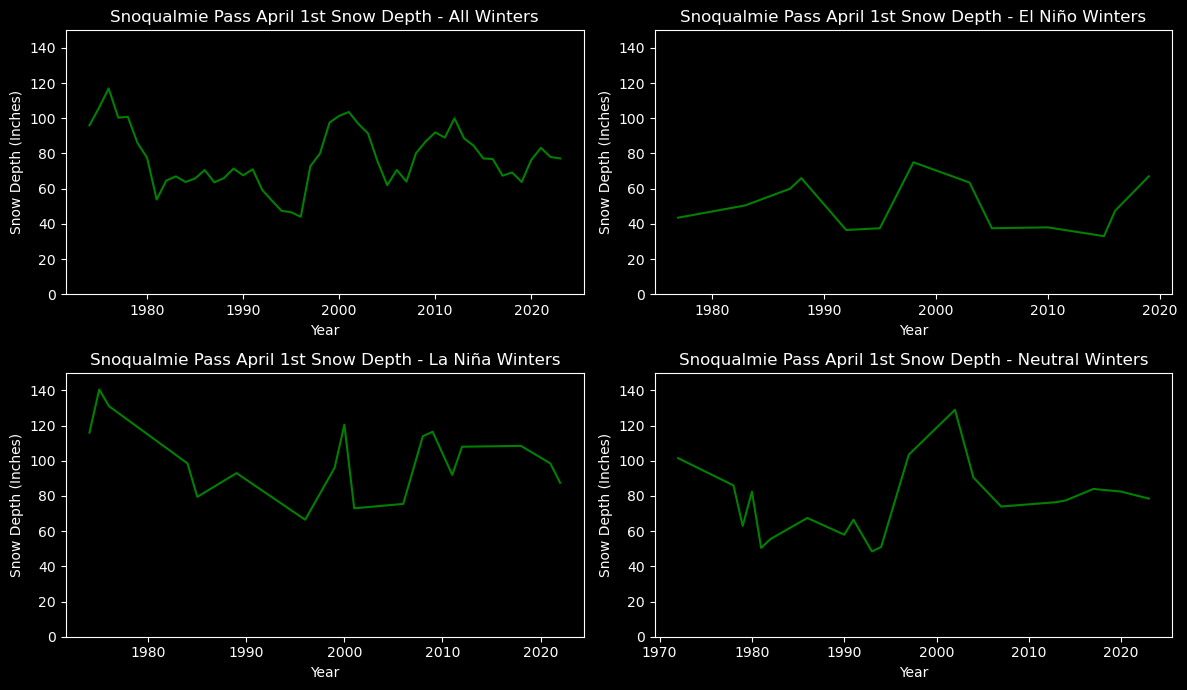

In [42]:
# Snoqualmie Pass snow depth

fig, axs = plt.subplots(2, 2, figsize = (12, 7)) # Two rows, 2 columns

# Plot for all winters
enso_rolling_average.plot(y = 'Snoqualmie Pass Snow Depth Rolling Average', x = 'Year',
                                    ylabel = 'Snow Depth (Inches)', legend = False, color = 'green', ax = axs[0,0])

axs[0,0].set_title('Snoqualmie Pass April 1st Snow Depth - All Winters')
axs[0,0].set_ylim(0, 150)

# Plot for El Niño winters 
el_nino.plot(y = 'Snoqualmie Pass Snow Depth Rolling Average', x='Year',
             ylabel = 'Snow Depth (Inches)', legend = False, color = 'green', ax = axs[0, 1])

axs[0, 1].set_title('Snoqualmie Pass April 1st Snow Depth - El Niño Winters')
axs[0, 1].set_ylim(0, 150)

# Plot for La Niña winters
la_nina.plot(y = 'Snoqualmie Pass Snow Depth Rolling Average', x ='Year',
              ylabel = 'Snow Depth (Inches)', legend = False, color ='green', ax = axs[1, 0])

axs[1, 0].set_title('Snoqualmie Pass April 1st Snow Depth - La Niña Winters')
axs[1, 0].set_ylim(0, 150)

# Plot for neutral winters
neutral.plot(y = 'Snoqualmie Pass Snow Depth Rolling Average', x = 'Year',
            ylabel = 'Snow Depth (Inches)', legend = False, color = 'green', ax = axs[1, 1] )

axs[1, 1].set_title('Snoqualmie Pass April 1st Snow Depth - Neutral Winters') 
axs[1, 1].set_ylim(0, 150)
plt.tight_layout()
plt.show()

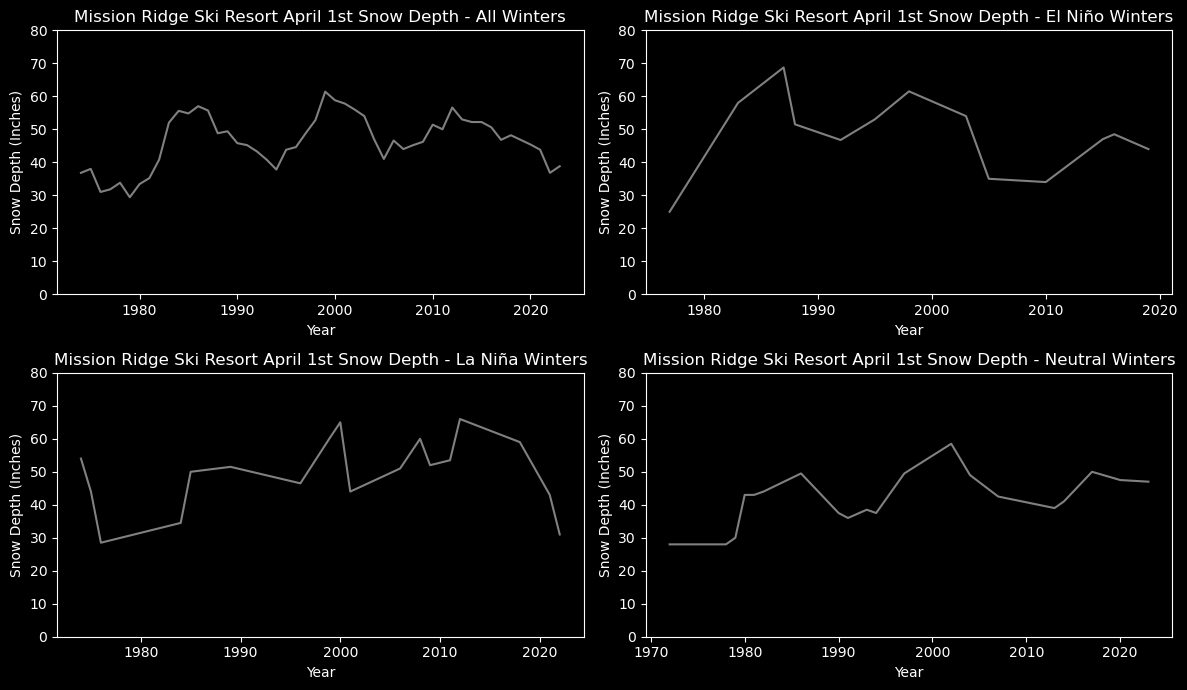

In [43]:
# Mission Ridge Ski Resort snow depth

fig, axs = plt.subplots(2, 2, figsize = (12, 7)) # Two rows, 2 columns

# Plot for all winters
enso_rolling_average.plot(y = 'Mission Ridge Snow Depth Rolling Average', x = 'Year',
                                    ylabel = 'Snow Depth (Inches)', legend = False, color = 'grey', ax = axs[0,0])

axs[0,0].set_title('Mission Ridge Ski Resort April 1st Snow Depth - All Winters')
axs[0,0].set_ylim(0, 80)

# Plot for El Niño winters 
el_nino.plot(y = 'Mission Ridge Snow Depth Rolling Average', x='Year',
             ylabel = 'Snow Depth (Inches)', legend = False, color = 'grey', ax = axs[0, 1])

axs[0, 1].set_title('Mission Ridge Ski Resort April 1st Snow Depth - El Niño Winters')
axs[0, 1].set_ylim(0, 80)

# Plot for La Niña winters
la_nina.plot(y = 'Mission Ridge Snow Depth Rolling Average', x ='Year',
              ylabel = 'Snow Depth (Inches)', legend = False, color ='grey', ax = axs[1, 0])

axs[1, 0].set_title('Mission Ridge Ski Resort April 1st Snow Depth - La Niña Winters')
axs[1, 0].set_ylim(0, 80)

# Plot for neutral winters
neutral.plot(y = 'Mission Ridge Snow Depth Rolling Average', x = 'Year',
            ylabel = 'Snow Depth (Inches)', legend = False, color = 'grey', ax = axs[1, 1] )

axs[1, 1].set_title('Mission Ridge Ski Resort April 1st Snow Depth - Neutral Winters') 
axs[1, 1].set_ylim(0, 80)
plt.tight_layout()
plt.show()

#### Question 1 Continued
* Create some scatter plots with trend lines to show the general trend in snowfall and snow depth by ENSO winter pattern

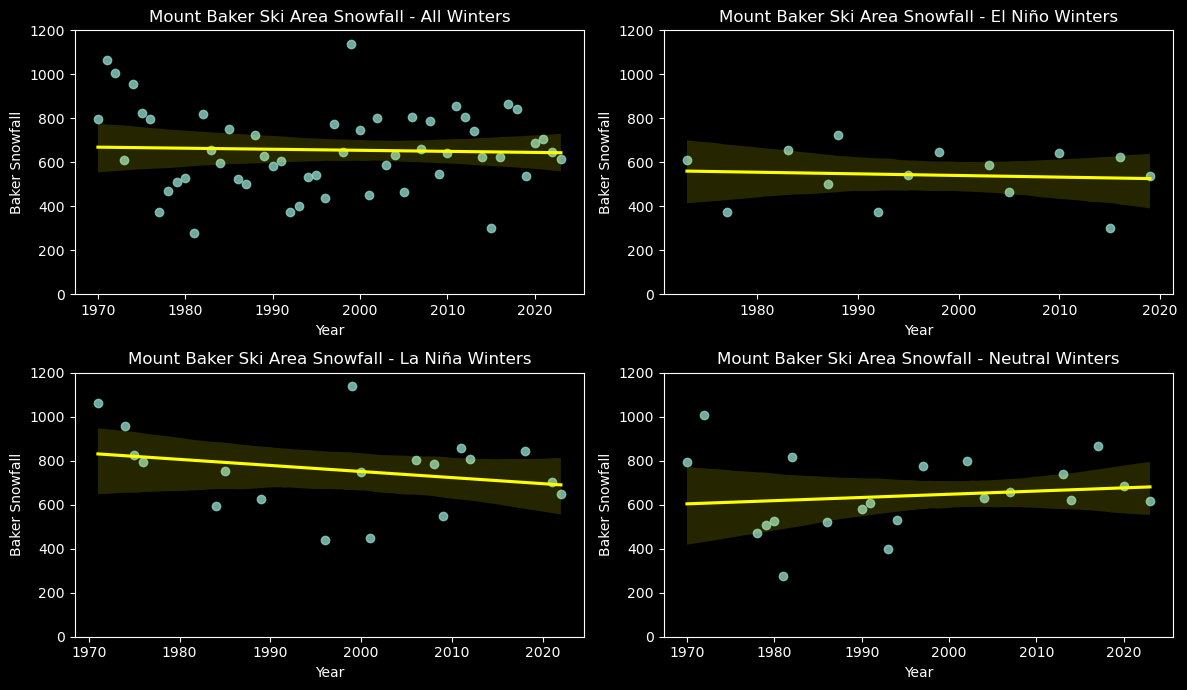

In [62]:
# Baker snowfall
fig, axs = plt.subplots(2, 2, figsize = (12, 7)) # Two rows, 2 columns
sns.regplot(data = enso_rolling_average, x = 'Year', y = 'Baker Snowfall', line_kws= {'color':'yellow'}, ax = axs[0,0])
axs[0,0].set_title('Mount Baker Ski Area Snowfall - All Winters')
axs[0,0].set_ylim(0, 1200)

sns.regplot(data = el_nino, x = 'Year', y = 'Baker Snowfall', line_kws = {'color': 'yellow'}, ax = axs[0, 1])
axs[0,1].set_title('Mount Baker Ski Area Snowfall - El Niño Winters')
axs[0,1].set_ylim(0, 1200)

sns.regplot(data = la_nina, x = 'Year', y = 'Baker Snowfall', line_kws = {'color': 'yellow'}, ax =  axs[1, 0])
axs[1, 0].set_title('Mount Baker Ski Area Snowfall - La Niña Winters')
axs[1, 0].set_ylim(0, 1200)

sns.regplot(data = neutral, x = 'Year', y = 'Baker Snowfall', line_kws = {'color': 'yellow'}, ax = axs[1, 1])
axs[1, 1].set_title('Mount Baker Ski Area Snowfall - Neutral Winters')
axs[1, 1].set_ylim(0, 1200)

plt.tight_layout()
plt.show() 

#### Insights:
* Snowfall at the Mount Baker Ski Area shows a slight decrease in annual snowfall since 1970.
* When observing the different ENSO weather pattens, there appears to be a slight decreass for El Niño winters, with a bigger decrease for La Niña winters.
* For neutral winters, there has been an increase in snowfall.
* Rates of increase and decrease demonstrate variation depending on the ENSO weather pattern.
* Important consideration: Mount Baker Ski Area sits between Mount Baker and Mount Shuksan which can higly influence the local weather. The area is also further north resulting in receiving cooler air from the north compared to areas and resorts down south. The elevation snowfall measurement is at around 4,000 feet above sea level.

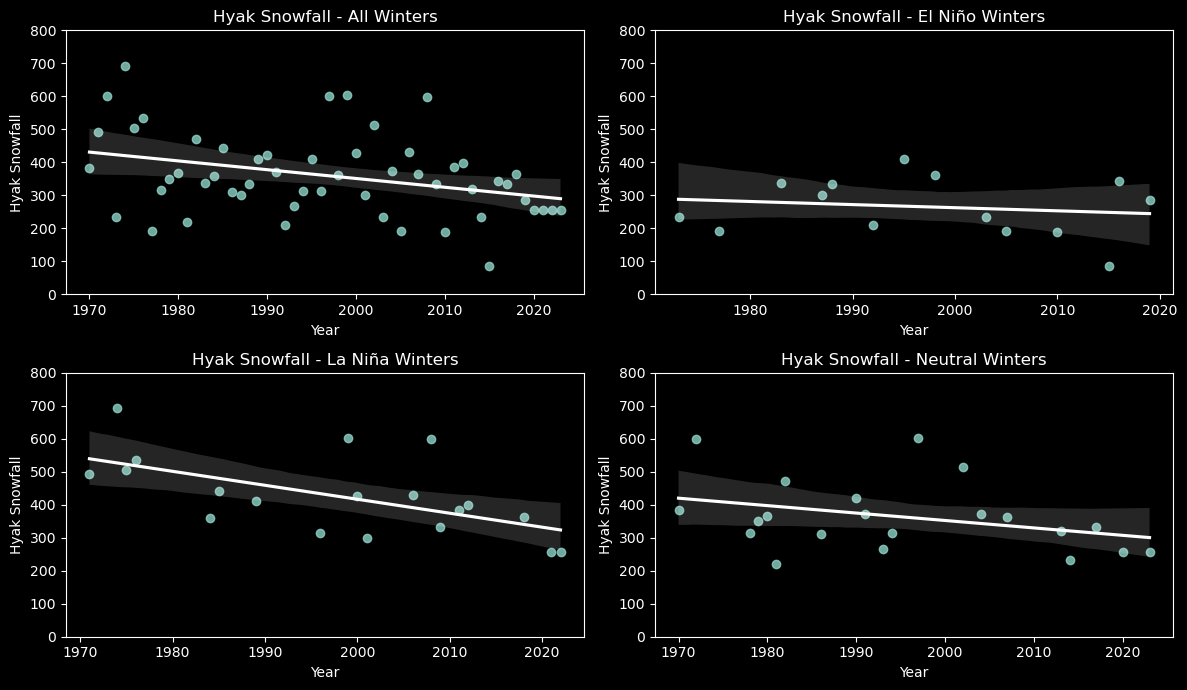

In [66]:
# Hyak Snowfall

fig, axs = plt.subplots(2, 2, figsize = (12, 7)) # Two rows, 2 columns
sns.regplot(data = enso_rolling_average, x = 'Year', y = 'Hyak Snowfall', line_kws= {'color':'white'}, ax = axs[0,0])
axs[0,0].set_title('Hyak Snowfall - All Winters')
axs[0,0].set_ylim(0, 800)

sns.regplot(data = el_nino, x = 'Year', y = 'Hyak Snowfall', line_kws = {'color': 'white'}, ax = axs[0, 1])
axs[0,1].set_title('Hyak Snowfall - El Niño Winters')
axs[0,1].set_ylim(0, 800)

sns.regplot(data = la_nina, x = 'Year', y = 'Hyak Snowfall', line_kws = {'color': 'white'}, ax =  axs[1, 0])
axs[1, 0].set_title('Hyak Snowfall - La Niña Winters')
axs[1, 0].set_ylim(0, 800)

sns.regplot(data = neutral, x = 'Year', y = 'Hyak Snowfall', line_kws = {'color': 'white'}, ax = axs[1, 1])
axs[1, 1].set_title('Hyak Snowfall - Neutral Winters')
axs[1, 1].set_ylim(0, 800)

plt.tight_layout()
plt.show() 

#### Key insights:
* Sitting at an elevation below 3,000 feet above sea level and further south than Mount Baker Ski Area, Hyak has seen a significat decreaase in snowfall since 1970.
* There is also a decrease when factoring the ENSO weather patterns with La Niña winters showing a steeper decrease when compared to El Niño, neutral, and all winters combined.

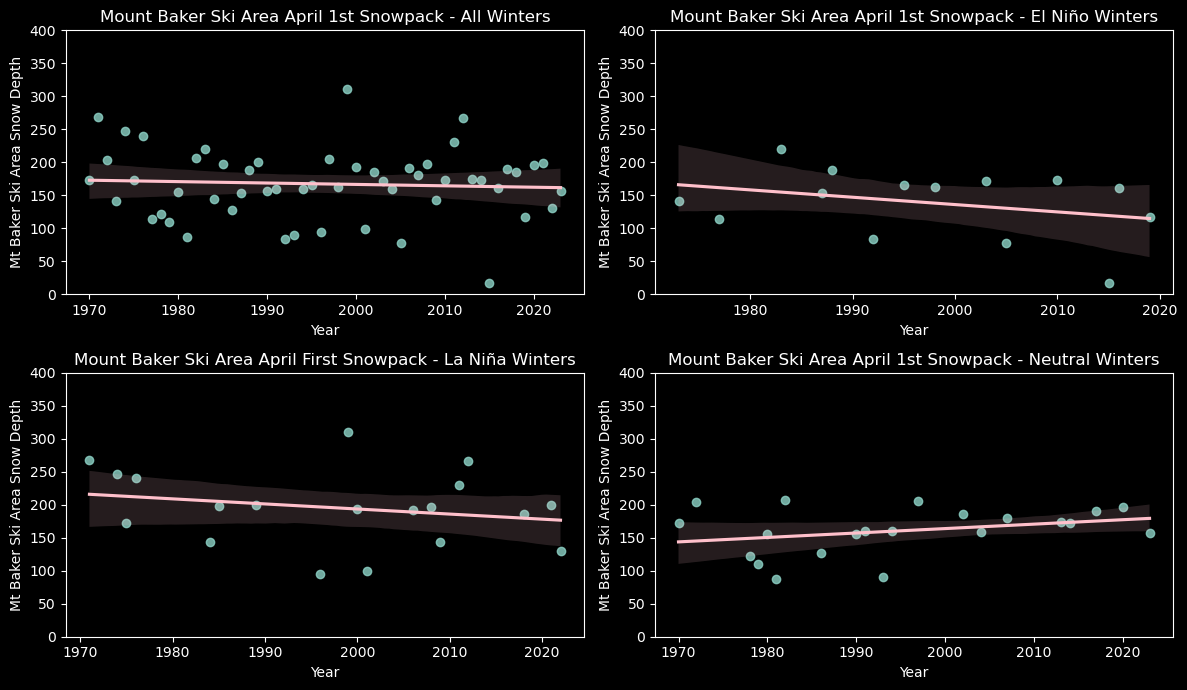

In [76]:
# Baker April 1st Snow Depth

fig, axs = plt.subplots(2, 2, figsize = (12, 7)) # Two rows, 2 columns
sns.regplot(data = enso_rolling_average, x = 'Year', y = 'Mt Baker Ski Area Snow Depth', 
            line_kws= {'color':'pink'}, ax = axs[0,0])
axs[0,0].set_title('Mount Baker Ski Area April 1st Snowpack - All Winters')
axs[0,0].set_ylim(0, 400)

sns.regplot(data = el_nino, x = 'Year', y = 'Mt Baker Ski Area Snow Depth', 
            line_kws = {'color': 'pink'}, ax = axs[0, 1])
axs[0,1].set_title('Mount Baker Ski Area April 1st Snowpack - El Niño Winters')
axs[0,1].set_ylim(0, 400)

sns.regplot(data = la_nina, x = 'Year', y = 'Mt Baker Ski Area Snow Depth', 
            line_kws = {'color': 'pink'}, ax =  axs[1, 0])
axs[1, 0].set_title('Mount Baker Ski Area April 1st Snowpack - La Niña Winters')
axs[1, 0].set_ylim(0, 400)

sns.regplot(data = neutral, x = 'Year', y = 'Mt Baker Ski Area Snow Depth', 
            line_kws = {'color': 'pink'}, ax = axs[1, 1])
axs[1, 1].set_title('Mount Baker Ski Area April 1st Snowpack - Neutral Winters')
axs[1, 1].set_ylim(0, 400)

plt.tight_layout()
plt.show() 

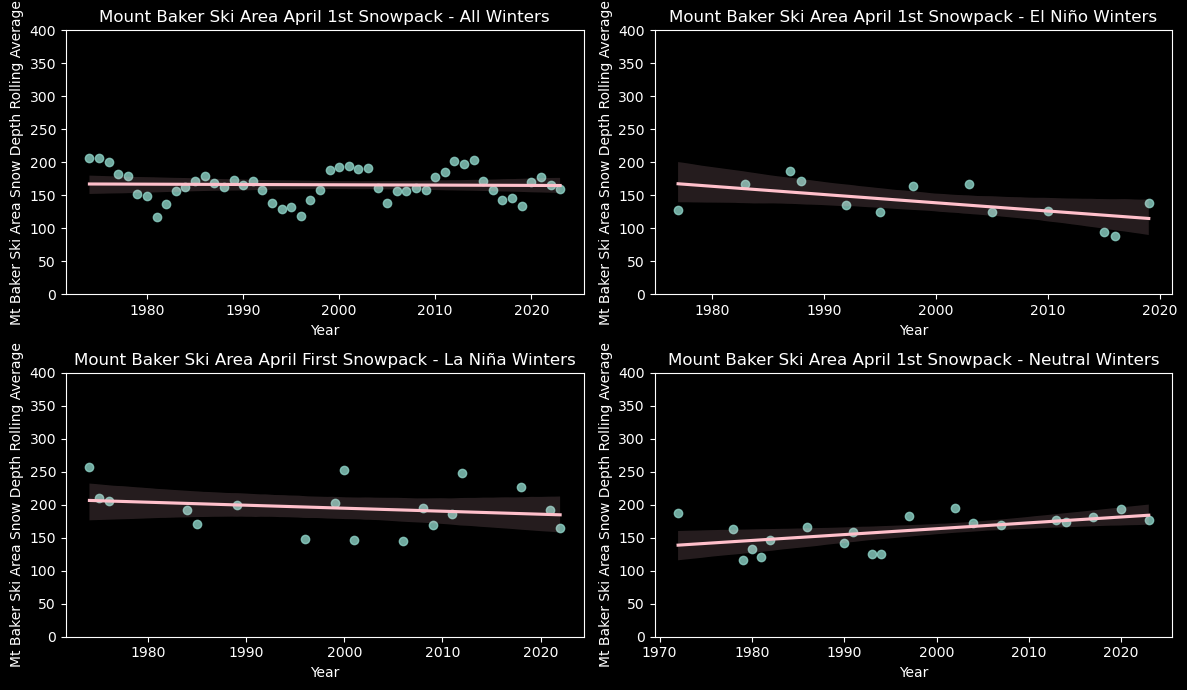

In [78]:
# Baker April 1st Snow Depth Rolling Average

fig, axs = plt.subplots(2, 2, figsize = (12, 7)) # Two rows, 2 columns
sns.regplot(data = enso_rolling_average, x = 'Year', y = 'Mt Baker Ski Area Snow Depth Rolling Average', 
            line_kws= {'color':'pink'}, ax = axs[0,0])
axs[0,0].set_title('Mount Baker Ski Area April 1st Snowpack - All Winters')
axs[0,0].set_ylim(0, 400)

sns.regplot(data = el_nino, x = 'Year', y = 'Mt Baker Ski Area Snow Depth Rolling Average', 
            line_kws = {'color': 'pink'}, ax = axs[0, 1])
axs[0,1].set_title('Mount Baker Ski Area April 1st Snowpack - El Niño Winters')
axs[0,1].set_ylim(0, 400)

sns.regplot(data = la_nina, x = 'Year', y = 'Mt Baker Ski Area Snow Depth Rolling Average', 
            line_kws = {'color': 'pink'}, ax =  axs[1, 0])
axs[1, 0].set_title('Mount Baker Ski Area April 1st Snowpack - La Niña Winters')
axs[1, 0].set_ylim(0, 400)

sns.regplot(data = neutral, x = 'Year', y = 'Mt Baker Ski Area Snow Depth Rolling Average', 
            line_kws = {'color': 'pink'}, ax = axs[1, 1])
axs[1, 1].set_title('Mount Baker Ski Area April 1st Snowpack - Neutral Winters')
axs[1, 1].set_ylim(0, 400)

plt.tight_layout()
plt.show() 

#### Key insights:
* Mount Baker Ski Area April 1st snowpack amounts show similar trend patterns as that of snowfall amounts since 1970. 

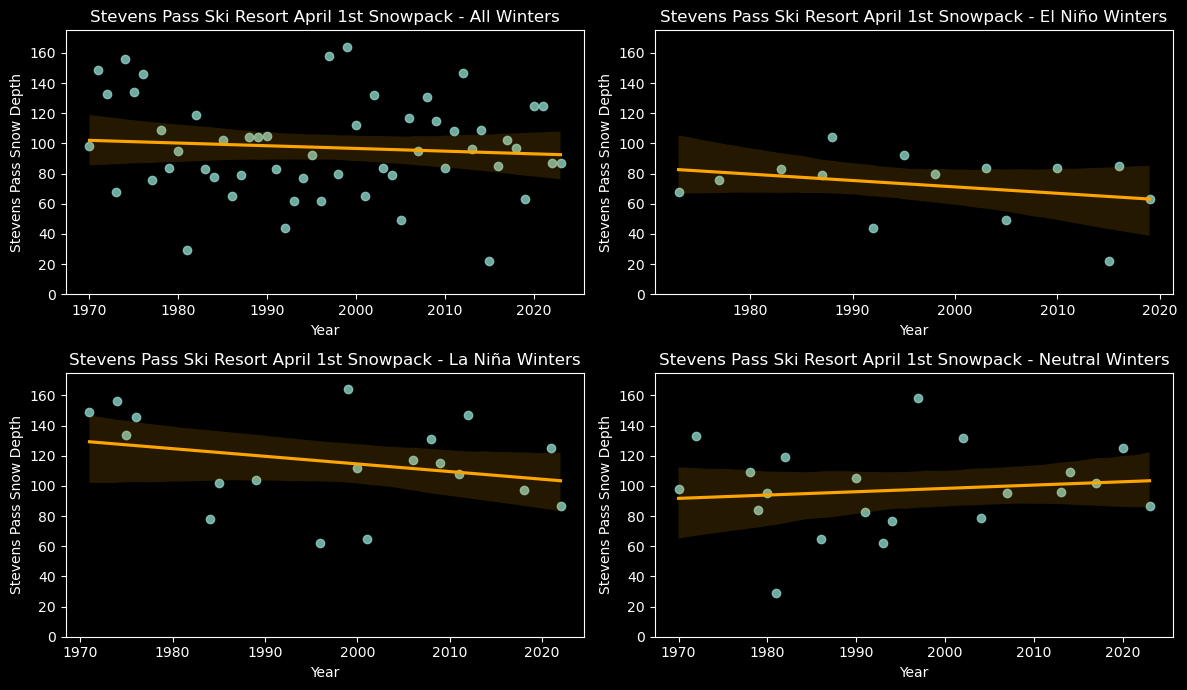

In [84]:
# Stevens Pass April 1st Snowpack

fig, axs = plt.subplots(2, 2, figsize = (12, 7)) # Two rows, 2 columns
sns.regplot(data = enso_rolling_average, x = 'Year', y = 'Stevens Pass Snow Depth', 
            line_kws= {'color':'orange'}, ax = axs[0,0])
axs[0,0].set_title('Stevens Pass Ski Resort April 1st Snowpack - All Winters')
axs[0,0].set_ylim(0, 175)

sns.regplot(data = el_nino, x = 'Year', y = 'Stevens Pass Snow Depth', 
            line_kws = {'color': 'orange'}, ax = axs[0, 1])
axs[0,1].set_title('Stevens Pass Ski Resort April 1st Snowpack - El Niño Winters')
axs[0,1].set_ylim(0, 175)

sns.regplot(data = la_nina, x = 'Year', y = 'Stevens Pass Snow Depth', 
            line_kws = {'color': 'orange'}, ax =  axs[1, 0])
axs[1, 0].set_title('Stevens Pass Ski Resort April 1st Snowpack - La Niña Winters')
axs[1, 0].set_ylim(0, 175)

sns.regplot(data = neutral, x = 'Year', y = 'Stevens Pass Snow Depth', 
            line_kws = {'color': 'orange'}, ax = axs[1, 1])
axs[1, 1].set_title('Stevens Pass Ski Resort April 1st Snowpack - Neutral Winters')
axs[1, 1].set_ylim(0, 175)

plt.tight_layout()
plt.show() 

#### Key insights:
* Stevens Pass Ski Resort April 1st snowpack amounts also demonstrate a decrease since 1970 from being just over 100 inches down to around 90 inches.
* Decreasing trends are also observed when factoring La Niña and El Niño winters, with an increasing trend when winters are neutral.
* Stevens Pass sits at an elevation of 4,062 feet above sea level and is located around the central part of the Cascades. 

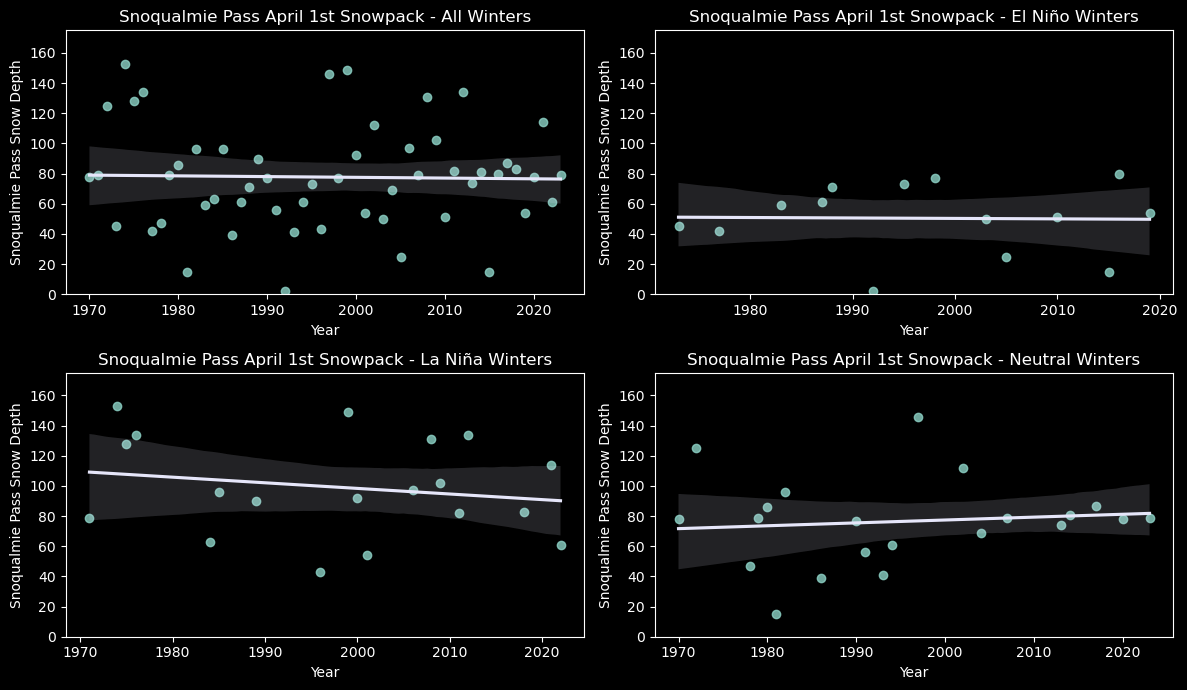

In [92]:
# Snoqualmie Pass April 1st Snowpack

fig, axs = plt.subplots(2, 2, figsize = (12, 7)) # Two rows, 2 columns
sns.regplot(data = enso_rolling_average, x = 'Year', y = 'Snoqualmie Pass Snow Depth', 
            line_kws= {'color':'lavender'}, ax = axs[0,0])
axs[0,0].set_title('Snoqualmie Pass April 1st Snowpack - All Winters')
axs[0,0].set_ylim(0, 175)

sns.regplot(data = el_nino, x = 'Year', y = 'Snoqualmie Pass Snow Depth', 
            line_kws = {'color': 'lavender'}, ax = axs[0, 1])
axs[0,1].set_title('Snoqualmie Pass April 1st Snowpack - El Niño Winters')
axs[0,1].set_ylim(0, 175)

sns.regplot(data = la_nina, x = 'Year', y = 'Snoqualmie Pass Snow Depth', 
            line_kws = {'color': 'lavender'}, ax =  axs[1, 0])
axs[1, 0].set_title('Snoqualmie Pass April 1st Snowpack - La Niña Winters')
axs[1, 0].set_ylim(0, 175)

sns.regplot(data = neutral, x = 'Year', y = 'Snoqualmie Pass Snow Depth', 
            line_kws = {'color': 'lavender'}, ax = axs[1, 1])
axs[1, 1].set_title('Snoqualmie Pass April 1st Snowpack - Neutral Winters')
axs[1, 1].set_ylim(0, 175)

plt.tight_layout()
plt.show() 

#### Key insights:
* Snoqualmie Pass April 1st snowpack trends appear to be holding steady since 1970.
* Variations in trends are observed when looking at the different ENSO weather patterns.
* For El Niño winters, the trend appears steady, downward for La Niña winters, and upward for neutral winters.
* Snoqualmie Pass sits at an elevation of 3,022 above sea level and is further south than Stevens Pass

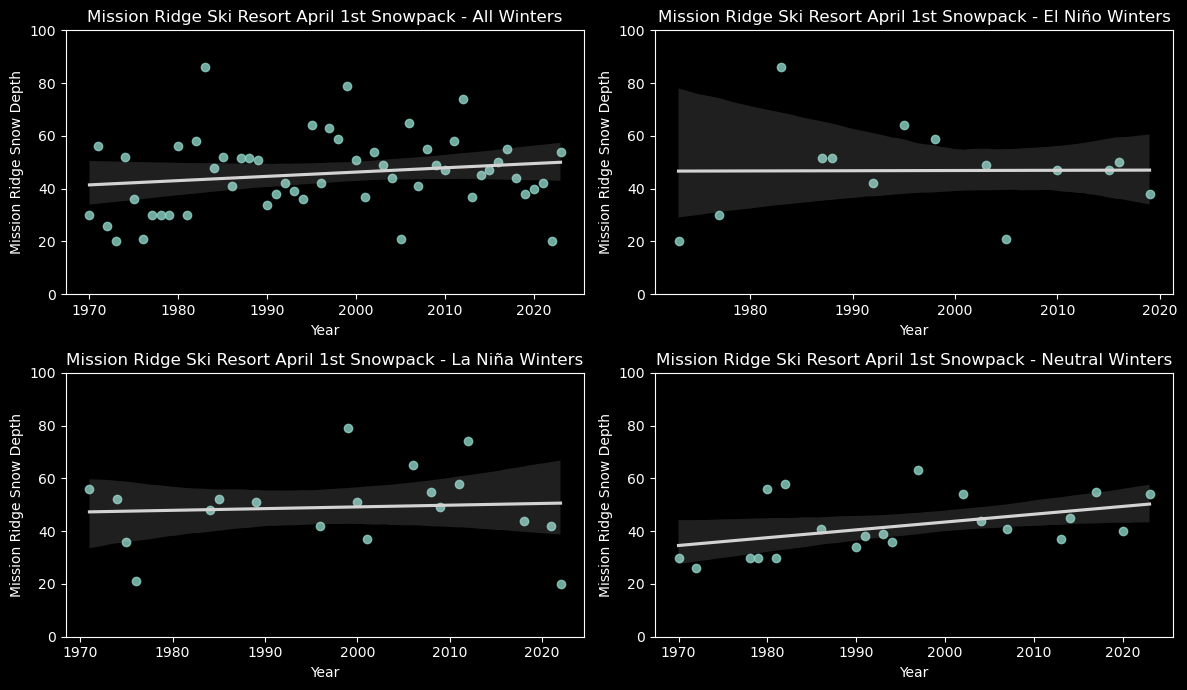

In [94]:
# Mission Ridge April 1st Snowpack

fig, axs = plt.subplots(2, 2, figsize = (12, 7)) # Two rows, 2 columns
sns.regplot(data = enso_rolling_average, x = 'Year', y = 'Mission Ridge Snow Depth', 
            line_kws= {'color':'lightgrey'}, ax = axs[0,0])
axs[0,0].set_title('Mission Ridge Ski Resort April 1st Snowpack - All Winters')
axs[0,0].set_ylim(0, 100)

sns.regplot(data = el_nino, x = 'Year', y = 'Mission Ridge Snow Depth', 
            line_kws = {'color': 'lightgrey'}, ax = axs[0, 1])
axs[0,1].set_title('Mission Ridge Ski Resort April 1st Snowpack - El Niño Winters')
axs[0,1].set_ylim(0, 100)

sns.regplot(data = la_nina, x = 'Year', y = 'Mission Ridge Snow Depth', 
            line_kws = {'color': 'lightgrey'}, ax =  axs[1, 0])
axs[1, 0].set_title('Mission Ridge Ski Resort April 1st Snowpack - La Niña Winters')
axs[1, 0].set_ylim(0, 100)

sns.regplot(data = neutral, x = 'Year', y = 'Mission Ridge Snow Depth', 
            line_kws = {'color': 'lightgrey'}, ax = axs[1, 1])
axs[1, 1].set_title('Mission Ridge Ski Resort April 1st Snowpack - Neutral Winters')
axs[1, 1].set_ylim(0, 100)

plt.tight_layout()
plt.show() 

#### Key insights:
* Mission Ridge Ski Resort shows increasing trends when it comes to April 1st snowpack amounts accross all ENSO weather patterns and accross all winters combined. 
* The largest increase is seen during neutral winters.
* The resort is in the eastern side of the Cascade Mountain Range and the base elevation is at 4,570 feet above sea level.
* Resorts on the eastern side of the Cascades typically receive less snowfall than areas on the western side.

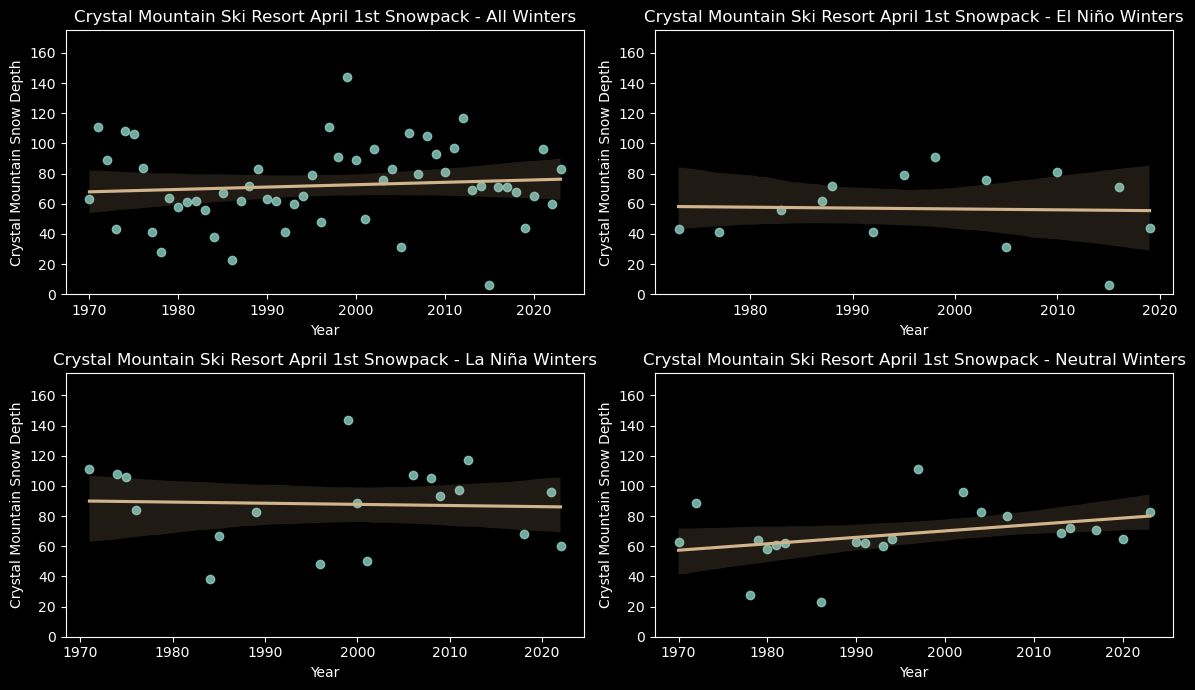

In [99]:
# Crystal Mountain April 1st Snowpack

fig, axs = plt.subplots(2, 2, figsize = (12, 7)) # Two rows, 2 columns
sns.regplot(data = enso_rolling_average, x = 'Year', y = 'Crystal Mountain Snow Depth', 
            line_kws= {'color':'tan'}, ax = axs[0,0])
axs[0,0].set_title('Crystal Mountain Ski Resort April 1st Snowpack - All Winters')
axs[0,0].set_ylim(0, 175)

sns.regplot(data = el_nino, x = 'Year', y = 'Crystal Mountain Snow Depth', 
            line_kws = {'color': 'tan'}, ax = axs[0, 1])
axs[0,1].set_title('Crystal Mountain Ski Resort April 1st Snowpack - El Niño Winters')
axs[0,1].set_ylim(0, 175)

sns.regplot(data = la_nina, x = 'Year', y = 'Crystal Mountain Snow Depth', 
            line_kws = {'color': 'tan'}, ax =  axs[1, 0])
axs[1, 0].set_title('Crystal Mountain Ski Resort April 1st Snowpack - La Niña Winters')
axs[1, 0].set_ylim(0, 175)

sns.regplot(data = neutral, x = 'Year', y = 'Crystal Mountain Snow Depth', 
            line_kws = {'color': 'tan'}, ax = axs[1, 1])
axs[1, 1].set_title('Crystal Mountain Ski Resort April 1st Snowpack - Neutral Winters')
axs[1, 1].set_ylim(0, 175)

plt.tight_layout()
plt.show() 

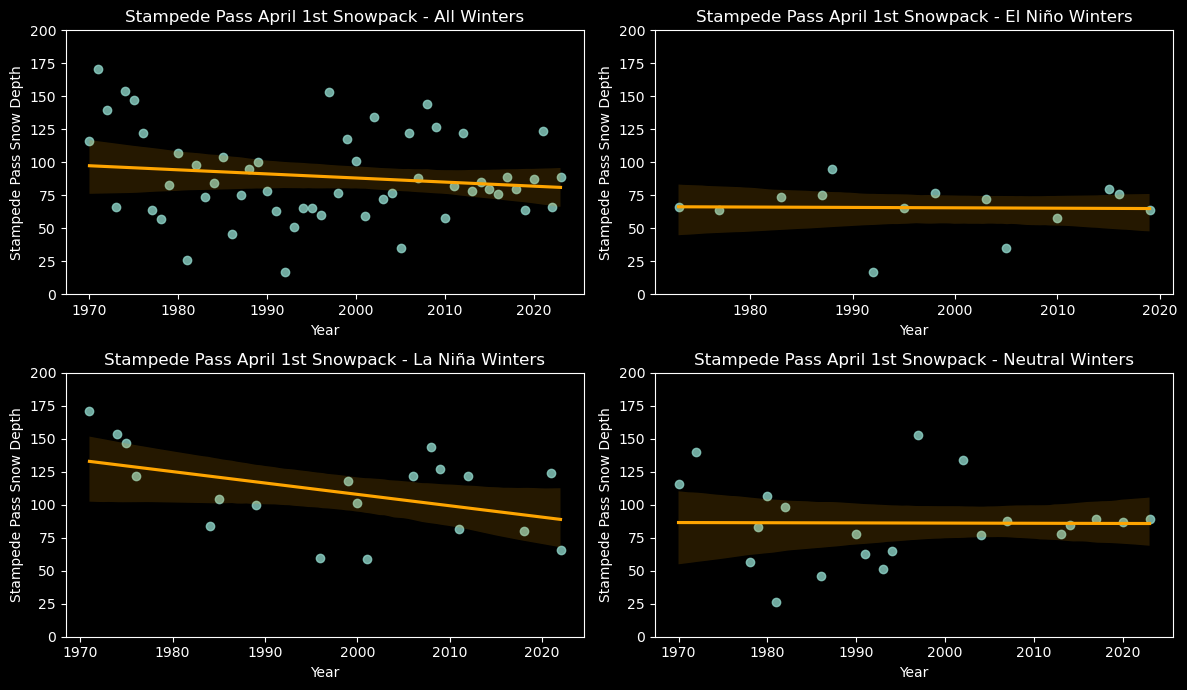

In [102]:
# Stampede Pass April 1st Snowpack

fig, axs = plt.subplots(2, 2, figsize = (12, 7)) # Two rows, 2 columns
sns.regplot(data = enso_rolling_average, x = 'Year', y = 'Stampede Pass Snow Depth', 
            line_kws= {'color':'orange'}, ax = axs[0,0])
axs[0,0].set_title('Stampede Pass April 1st Snowpack - All Winters')
axs[0,0].set_ylim(0, 200)

sns.regplot(data = el_nino, x = 'Year', y = 'Stampede Pass Snow Depth', 
            line_kws = {'color': 'orange'}, ax = axs[0, 1])
axs[0,1].set_title('Stampede Pass April 1st Snowpack - El Niño Winters')
axs[0,1].set_ylim(0, 200)

sns.regplot(data = la_nina, x = 'Year', y = 'Stampede Pass Snow Depth', 
            line_kws = {'color': 'orange'}, ax =  axs[1, 0])
axs[1, 0].set_title('Stampede Pass April 1st Snowpack - La Niña Winters')
axs[1, 0].set_ylim(0, 200)

sns.regplot(data = neutral, x = 'Year', y = 'Stampede Pass Snow Depth', 
            line_kws = {'color': 'orange'}, ax = axs[1, 1])
axs[1, 1].set_title('Stampede Pass April 1st Snowpack - Neutral Winters')
axs[1, 1].set_ylim(0, 200)

plt.tight_layout()
plt.show() 

#### 1. Has there been a signficant decrease in snowfall or snow depth since 1970?
* Most areas show a decreasing trend in snowfall or snowpack amounts since 1970. 
* Some areas have eperienced a greater decrease than others, with Hyak having a significant decrease. 
* Variations in trends based on the ENSO weather pattern during the particular spring/winter season are present.
* These trends have variations when comparing the different resorts/areas.
* Considerations: Elevation, geographical location, and topographical features can influence snowfall patterns affecting the amount of snow an area gets.
* Limitations: Other factors to consider are other weather phenomena that could contribute to how much of an influence a given ENSO weather pattern will have on the region. An example is a phenomena known as the Blob which is an area of warm water in the Northern Pacific that can highly influence climate changes. Another factor to consider is the role of overall rising sea tempeatures and the temperature anomalies in relationhip to the current sea temperature when compared to the average sea surface temperature over a given time-span. 

* Note: Plots will be created to see if there are any associations between annual sea temperature anomalies and snowfall/snowpack. Charts will also be created to see how this variable may be affecting recent snowfall trends. This will be done on a separate Jupyter Notebook. 

#### End Question 1

In [46]:
%whos

Variable                 Type         Data/Info
-----------------------------------------------
axs                      ndarray      2x2: 4 elems, type `object`, 32 bytes
column                   str          Stevens Pass Snow Depth
el_nino                  DataFrame        Year  Baker Snowfall <...>n\n[14 rows x 35 columns]
el_nino_years            Series       0     1973\n1     1977\n2<...>nName: Year, dtype: int64
enso                     DataFrame        Year  Baker Snowfall <...>   Highly Above Average  
enso_filtered            DataFrame        Baker Snowfall  Parad<...>                   97.4  
enso_rolling_average     DataFrame        Year  Baker Snowfall <...>                   97.4  
fig                      Figure       Figure(1200x700)
la_nina                  DataFrame        Year  Baker Snowfall <...>n\n[19 rows x 35 columns]
la_nina_years            Series       0     1971\n1     1974\n2<...>nName: Year, dtype: int64
neutral                  DataFrame        Year  Baker

In [58]:
el_nino.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 35 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Year                                          14 non-null     int64  
 1   Baker Snowfall                                14 non-null     float64
 2   Paradise Snowfall                             14 non-null     float64
 3   Hyak Snowfall                                 14 non-null     float64
 4   Crystal Mountain Snow Depth                   14 non-null     float64
 5   Mission Ridge Snow Depth                      14 non-null     float64
 6   Mt Baker Ski Area Snow Depth                  14 non-null     float64
 7   Paradise Snow Depth                           14 non-null     float64
 8   Snoqualmie Pass Snow Depth                    14 non-null     float64
 9   Stampede Pass Snow Depth                      14 non-null     float